In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics
import json 
from datetime import datetime

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.linear_model import Perceptron

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

%matplotlib inline


In [2]:
# https://stackoverflow.com/questions/956867/how-to-get-string-objects-instead-of-unicode-from-json

def byteify(input):
    if isinstance(input, dict):
        return {byteify(key): byteify(value)
                for key, value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

In [3]:
# load csv file into Pandas dataframe table format
df = pd.read_csv('Ultimate_Users_2014.csv')

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,month_last_trip,month_signup,delta_time_last_trip_months,long_term_status
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6,1,4.698248,lt
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5,1,3.154069,st
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,1,0.032855,st
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6,1,5.585330,lt
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3,1,1.544180,st


In [4]:
#Convert date as strings into datetime objects
# & overwrite orignial columns

df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [5]:
df.dtypes

avg_dist                              float64
avg_rating_by_driver                  float64
avg_rating_of_driver                  float64
avg_surge                             float64
city                                   object
last_trip_date                 datetime64[ns]
phone                                  object
signup_date                    datetime64[ns]
surge_pct                             float64
trips_in_first_30_days                  int64
ultimate_black_user                      bool
weekday_pct                           float64
month_last_trip                         int64
month_signup                            int64
delta_time_last_trip_months           float64
long_term_status                       object
dtype: object

In [6]:
df['month_last_trip'] = pd.DatetimeIndex(df['last_trip_date']).month

In [7]:
df.month_last_trip.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: month_last_trip, dtype: int64

In [8]:
df['month_signup'] = pd.DatetimeIndex(df['signup_date']).month

df.month_signup.value_counts()

1    50000
Name: month_signup, dtype: int64

In [9]:
df['delta_time_last_trip_months'] = (df['last_trip_date'] - df['signup_date'])/np.timedelta64(1,'M')

In [10]:
#df[['avg_dist','trips_in_first_30_days','dist_first_30']].head(15)

## Looks like an error with the data: average distance for first 30 days should be 0 if number of trips in first 30 days is also 0

In [11]:
num_boo_boos = 0

for ind in df.index: 
    if (df['avg_dist'][ind] > 0) & (df['trips_in_first_30_days'][ind]== 0):
        num_boo_boos +=1
        print('Distance : '+ str(df['avg_dist'][ind]))
        print('num_of_trips : '+ str(df['trips_in_first_30_days'][ind]))
        print
 


Distance : 8.26
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 12.08
num_of_trips : 0

Distance : 11.47
num_of_trips : 0

Distance : 7.74
num_of_trips : 0

Distance : 5.97
num_of_trips : 0

Distance : 1.38
num_of_trips : 0

Distance : 3.8
num_of_trips : 0

Distance : 3.25
num_of_trips : 0

Distance : 4.98
num_of_trips : 0

Distance : 10.21
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 4.44
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 1.45
num_of_trips : 0

Distance : 19.8
num_of_trips : 0

Distance : 10.49
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 5.01
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 8.3
num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 16.85
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 1

Distance : 4.84
num_of_trips : 0

Distance : 19.08
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 7.76
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 2.06
num_of_trips : 0

Distance : 5.03
num_of_trips : 0

Distance : 17.57
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 1.27
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 19.19
num_of_trips : 0

Distance : 7.21
num_of_trips : 0

Distance : 24.14
num_of_trips : 0

Distance : 21.02
num_of_trips : 0

Distance : 9.55
num_of_trips : 0

Distance : 13.52
num_of_trips : 0

Distance : 5.34
num_of_trips : 0

Distance : 14.38
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 8.94
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 9.96
num_of_trips : 0

Distance : 15.27
num_of_trips : 0

Distance : 3.93
num_of_trips : 0

Distance : 9.76
num_of_trips : 0

Distance : 0.01
num_of_trips : 0

Distanc

Distance : 4.06
num_of_trips : 0

Distance : 6.46
num_of_trips : 0

Distance : 2.76
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 2.65
num_of_trips : 0

Distance : 3.95
num_of_trips : 0

Distance : 1.18
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 18.34
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 3.26
num_of_trips : 0

Distance : 26.54
num_of_trips : 0

Distance : 0.77
num_of_trips : 0

Distance : 37.15
num_of_trips : 0

Distance : 16.37
num_of_trips : 0

Distance : 4.1
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 39.76
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 6.62
num_of_trips : 0

Distance : 10.97
num_of_trips : 0

Distance : 11.92
num_of_trips : 0

Distance : 2.46
num_of_trips : 0

Distance : 14.95
num_of_trips : 0

Distance : 5.75
num_of_trips : 0

Distance : 1.67
num_of_trips : 0

Distanc


Distance : 1.91
num_of_trips : 0

Distance : 41.03
num_of_trips : 0

Distance : 17.69
num_of_trips : 0

Distance : 5.09
num_of_trips : 0

Distance : 6.64
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 14.2
num_of_trips : 0

Distance : 11.13
num_of_trips : 0

Distance : 25.59
num_of_trips : 0

Distance : 13.83
num_of_trips : 0

Distance : 22.58
num_of_trips : 0

Distance : 1.28
num_of_trips : 0

Distance : 5.49
num_of_trips : 0

Distance : 1.35
num_of_trips : 0

Distance : 3.57
num_of_trips : 0

Distance : 14.75
num_of_trips : 0

Distance : 6.73
num_of_trips : 0

Distance : 4.75
num_of_trips : 0

Distance : 14.12
num_of_trips : 0

Distance : 14.05
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 6.79
num_of_trips : 0

Distance : 4.54
num_of_trips : 0

Distance : 6.56
num_of_trips : 0

Distance : 1.74
num_of_trips : 0

Distance : 7.01
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 14.36
num_of_trips : 0

Dis

num_of_trips : 0

Distance : 2.39
num_of_trips : 0

Distance : 2.97
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 2.21
num_of_trips : 0

Distance : 7.18
num_of_trips : 0

Distance : 4.78
num_of_trips : 0

Distance : 8.44
num_of_trips : 0

Distance : 3.67
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 14.4
num_of_trips : 0

Distance : 1.06
num_of_trips : 0

Distance : 10.0
num_of_trips : 0

Distance : 10.04
num_of_trips : 0

Distance : 5.39
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 12.27
num_of_trips : 0

Distance : 10.97
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 4.61
num_of_trips : 0

Distance : 15.1
num_of_trips : 0

Distance : 11.24
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 3.23
num_of_trips : 0

Distance : 9.77
num_of_trip

num_of_trips : 0

Distance : 2.11
num_of_trips : 0

Distance : 3.48
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 4.58
num_of_trips : 0

Distance : 1.31
num_of_trips : 0

Distance : 1.78
num_of_trips : 0

Distance : 10.83
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 2.01
num_of_trips : 0

Distance : 5.91
num_of_trips : 0

Distance : 0.98
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 0.9
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 4.0
num_of_trips : 0

Distance : 10.02
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 5.6
num_of_trips : 0

Distance : 4.17
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 8.05
num_of_trips : 0

Distance : 1.07
num_of_trips : 0

Distance : 13.63
num_of_trips : 0

Distance : 19.91
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 16.13
num_of_trips : 0

Distance : 0.88
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 6.63
num_of_trips : 0

Distance : 5.16
num_of_trips : 0

Distance : 18.34
num_of_trips : 0

Distance : 8.77
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 7.9
num_of_trips : 0

Distance : 8.58
num_of_trips : 0

Distance : 1.83
num_of_trips : 0

Distance : 3.58
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 14.98
num_of_trips : 0

Distance : 0.75
num_of_trips : 0

Distance : 11.09
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 3.28
num_of_trips : 0

Distance : 12.84
num_of_trips : 0

Distance : 15.62
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 16.12
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 1.46
num_of_trips : 0

Distance : 9.81
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 1.76
num_of_trips : 0

Distance : 6.73
num_of_trips : 0

Distance 

num_of_trips : 0

Distance : 13.98
num_of_trips : 0

Distance : 13.7
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 1.11
num_of_trips : 0

Distance : 3.36
num_of_trips : 0

Distance : 20.06
num_of_trips : 0

Distance : 10.41
num_of_trips : 0

Distance : 1.26
num_of_trips : 0

Distance : 7.45
num_of_trips : 0

Distance : 1.6
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 15.3
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 18.67
num_of_trips : 0

Distance : 6.3
num_of_trips : 0

Distance : 12.34
num_of_trips : 0

Distance : 5.56
num_of_trips : 0

Distance : 4.51
num_of_trips : 0

Distance : 3.27
num_of_trips : 0

Distance : 1.56
num_of_trips : 0

Distance : 0.1
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 4.72
num_of_trips : 0

Distance : 7.43
num_of_trips : 0

Distance : 6.3
num_of_trips : 0

Distance : 1.87
num_of_trips : 0

Distance : 4.07
num_of_trips : 0

Distance : 11.23
num_of_trips : 0

Distance : 4.71
num_of_trips

Distance : 2.12
num_of_trips : 0

Distance : 18.02
num_of_trips : 0

Distance : 6.8
num_of_trips : 0

Distance : 7.05
num_of_trips : 0

Distance : 4.57
num_of_trips : 0

Distance : 1.12
num_of_trips : 0

Distance : 2.73
num_of_trips : 0

Distance : 0.73
num_of_trips : 0

Distance : 16.71
num_of_trips : 0

Distance : 0.5
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 1.99
num_of_trips : 0

Distance : 11.96
num_of_trips : 0

Distance : 16.18
num_of_trips : 0

Distance : 6.0
num_of_trips : 0

Distance : 0.62
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 5.56
num_of_trips : 0

Distance : 12.49
num_of_trips : 0

Distance : 3.39
num_of_trips : 0

Distance : 6.21
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 2.99
num_of_trips : 0

Distance : 9.55
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 8.03
num_of_trips : 0

Distance : 0.65
num_of_trips : 0

Distance : 3.

num_of_trips : 0

Distance : 4.61
num_of_trips : 0

Distance : 4.69
num_of_trips : 0

Distance : 13.61
num_of_trips : 0

Distance : 4.03
num_of_trips : 0

Distance : 2.93
num_of_trips : 0

Distance : 16.64
num_of_trips : 0

Distance : 4.38
num_of_trips : 0

Distance : 11.57
num_of_trips : 0

Distance : 2.12
num_of_trips : 0

Distance : 14.69
num_of_trips : 0

Distance : 3.14
num_of_trips : 0

Distance : 2.14
num_of_trips : 0

Distance : 22.72
num_of_trips : 0

Distance : 5.35
num_of_trips : 0

Distance : 17.81
num_of_trips : 0

Distance : 13.05
num_of_trips : 0

Distance : 3.66
num_of_trips : 0

Distance : 24.34
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 3.43
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 5.69
num_of_trips : 0

Distance : 7.44
num_of_trips : 0

Distance : 13.52
num_of_trips : 0

Distance : 3.1
num_of_trips : 0

Distance : 5.03
num_of_trips : 0

Distance : 2.1
num_of_trips : 0

Distance : 1.57
num_of_trips : 0

Distance : 2.35
num_of_t

num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 4.86
num_of_trips : 0

Distance : 0.83
num_of_trips : 0

Distance : 13.13
num_of_trips : 0

Distance : 2.81
num_of_trips : 0

Distance : 27.88
num_of_trips : 0

Distance : 5.48
num_of_trips : 0

Distance : 1.34
num_of_trips : 0

Distance : 4.55
num_of_trips : 0

Distance : 5.8
num_of_trips : 0

Distance : 2.03
num_of_trips : 0

Distance : 5.82
num_of_trips : 0

Distance : 13.45
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 1.33
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 3.1
num_of_trips : 0

Distance : 3.47
num_of_trips : 0

Distance : 6.33
num_of_trips : 0

Distance : 2.34
num_of_trips : 0

Distance : 8.24
num_of_trips : 0

Distance : 17.87
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 6.96
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 1.95
num_of_trips 

num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 2.18
num_of_trips : 0

Distance : 9.09
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 10.85
num_of_trips : 0

Distance : 0.91
num_of_trips : 0

Distance : 9.98
num_of_trips : 0

Distance : 8.64
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 11.11
num_of_trips : 0

Distance : 3.65
num_of_trips : 0

Distance : 3.78
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 18.11
num_of_trips : 0

Distance : 10.15
num_of_trips : 0

Distance : 7.15
num_of_trips : 0

Distance : 4.08
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 32.01
num_of_trips : 0

Distance : 19.84
num_of_trips : 0

Distance : 2.98
num_of_trips : 0

Distance : 9.99
num_of_trips : 0

Distance : 2.48
num_of_trips : 0

Distance : 36.59
num_of_trips : 0

Distance : 17.83
num_of_trips : 0

Distance : 0.81
num_of_trips : 0

Distance : 20.67
num_of_trips : 0

Distance : 1.93
num_of_trips : 0

Distance : 24.45
num_

Distance : 9.05
num_of_trips : 0

Distance : 4.42
num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 7.56
num_of_trips : 0

Distance : 4.41
num_of_trips : 0

Distance : 3.22
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 18.13
num_of_trips : 0

Distance : 2.94
num_of_trips : 0

Distance : 12.74
num_of_trips : 0

Distance : 3.96
num_of_trips : 0

Distance : 0.83
num_of_trips : 0

Distance : 3.45
num_of_trips : 0

Distance : 8.79
num_of_trips : 0

Distance : 2.72
num_of_trips : 0

Distance : 9.88
num_of_trips : 0

Distance : 6.07
num_of_trips : 0

Distance : 3.6
num_of_trips : 0

Distance : 0.96
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 9.23
num_of_trips : 0

Distance : 4.11
num_of_trips : 0

Distance : 8.89
num_of_trips : 0

Distance : 27.62
num_of_trips : 0

Distance : 2.69
num_of_trips : 0

Distance : 4.68
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 36.3
num_of_trips : 0

Distance : 8.

Distance : 1.94
num_of_trips : 0

Distance : 6.02
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 2.08
num_of_trips : 0

Distance : 1.21
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 3.13
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 19.68
num_of_trips : 0

Distance : 10.65
num_of_trips : 0

Distance : 10.77
num_of_trips : 0

Distance : 1.91
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 7.12
num_of_trips : 0

Distance : 2.93
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 3.52
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 11.93
num_of_trips : 0

Distance : 14.01
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 2.98
num_of_trips : 0

Distance : 1.97
num_of_trips : 0

Distance : 2.02
num_of_trips : 0

Distance : 6.34
num_of_trips : 0

Distance :

Distance : 3.57
num_of_trips : 0

Distance : 3.89
num_of_trips : 0

Distance : 5.63
num_of_trips : 0

Distance : 7.7
num_of_trips : 0

Distance : 4.24
num_of_trips : 0

Distance : 17.16
num_of_trips : 0

Distance : 4.79
num_of_trips : 0

Distance : 1.44
num_of_trips : 0

Distance : 8.06
num_of_trips : 0

Distance : 10.26
num_of_trips : 0

Distance : 1.25
num_of_trips : 0

Distance : 0.6
num_of_trips : 0

Distance : 13.41
num_of_trips : 0

Distance : 3.56
num_of_trips : 0

Distance : 2.44
num_of_trips : 0

Distance : 11.13
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 8.76
num_of_trips : 0

Distance : 11.43
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 15.01
num_of_trips : 0

Distance : 3.93
num_of_trips : 0

Distance : 4.35
num_of_trips : 0

Distance : 6.57
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 7.9
num_of_trips : 0

Distance : 3.53
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 39.52
num_of_trips : 0

Distance : 

num_of_trips : 0

Distance : 15.56
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 3.87
num_of_trips : 0

Distance : 0.58
num_of_trips : 0

Distance : 11.74
num_of_trips : 0

Distance : 7.21
num_of_trips : 0

Distance : 4.5
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 1.27
num_of_trips : 0

Distance : 7.78
num_of_trips : 0

Distance : 7.03
num_of_trips : 0

Distance : 4.54
num_of_trips : 0

Distance : 11.04
num_of_trips : 0

Distance : 13.65
num_of_trips : 0

Distance : 2.4
num_of_trips : 0

Distance : 1.1
num_of_trips : 0

Distance : 3.94
num_of_trips : 0

Distance : 13.04
num_of_trips : 0

Distance : 4.68
num_of_trips : 0

Distance : 3.58
num_of_trips : 0

Distance : 23.27
num_of_trips : 0

Distance : 2.84
num_of_trips : 0

Distance : 15.23
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 2.58
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 8.89
num_of_trips : 0

Distance : 4.84
num_of_tri

num_of_trips : 0

Distance : 24.72
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 1.14
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 31.09
num_of_trips : 0

Distance : 18.15
num_of_trips : 0

Distance : 5.54
num_of_trips : 0

Distance : 0.75
num_of_trips : 0

Distance : 0.93
num_of_trips : 0

Distance : 4.45
num_of_trips : 0

Distance : 18.69
num_of_trips : 0

Distance : 17.66
num_of_trips : 0

Distance : 1.37
num_of_trips : 0

Distance : 2.58
num_of_trips : 0

Distance : 16.47
num_of_trips : 0

Distance : 13.91
num_of_trips : 0

Distance : 9.79
num_of_trips : 0

Distance : 7.0
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 3.2
num_of_trips : 0

Distance : 14.69
num_of_trips : 0

Distance : 3.66
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 3.21
num_of_trips : 0

Distance : 7.41
num_of_trips : 0

Distance : 1.6
num_of_trips : 0

Distance : 8.49
num_of_trips : 0

Distance : 2.27
num_of_tr

Distance : 3.89
num_of_trips : 0

Distance : 0.89
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 0.98
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 3.91
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 9.38
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 4.94
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 6.37
num_of_trips : 0

Distance : 24.57
num_of_trips : 0

Distance : 11.25
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 0.65
num_of_trips : 0

Distance : 9.4
num_of_trips : 0

Distance : 14.31
num_of_trips : 0

Distance : 4.82
num_of_trips : 0

Distance : 14.26
num_of_trips : 0

Distance : 18.22
num_of_trips : 0

Distance : 3.44
num_of_trips : 0

Distance : 3.38
num_of_trips : 0

Distance : 0.67
num_of_trips : 0

Distance : 7.79
num_of_trips : 0

Distance : 1.02
num_of_trips : 0

Distance :

Distance : 1.12
num_of_trips : 0

Distance : 2.67
num_of_trips : 0

Distance : 4.94
num_of_trips : 0

Distance : 5.53
num_of_trips : 0

Distance : 5.87
num_of_trips : 0

Distance : 16.12
num_of_trips : 0

Distance : 2.37
num_of_trips : 0

Distance : 0.92
num_of_trips : 0

Distance : 21.2
num_of_trips : 0

Distance : 12.66
num_of_trips : 0

Distance : 3.91
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 6.79
num_of_trips : 0

Distance : 23.03
num_of_trips : 0

Distance : 8.98
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 1.73
num_of_trips : 0

Distance : 15.58
num_of_trips : 0

Distance : 2.0
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 4.23
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 7.68
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 17.58
num_of_trips : 0

Distance : 3.71
num_of_trips : 0

Distance : 2.97
num_of_trips : 0

Distance : 2.04
num_of_trips : 0

Distance :

num_of_trips : 0

Distance : 5.61
num_of_trips : 0

Distance : 12.37
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 6.25
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 2.91
num_of_trips : 0

Distance : 9.67
num_of_trips : 0

Distance : 14.89
num_of_trips : 0

Distance : 2.34
num_of_trips : 0

Distance : 25.66
num_of_trips : 0

Distance : 5.67
num_of_trips : 0

Distance : 39.79
num_of_trips : 0

Distance : 4.49
num_of_trips : 0

Distance : 4.93
num_of_trips : 0

Distance : 1.15
num_of_trips : 0

Distance : 2.28
num_of_trips : 0

Distance : 19.32
num_of_trips : 0

Distance : 2.46
num_of_trips : 0

Distance : 6.72
num_of_trips : 0

Distance : 23.34
num_of_trips : 0

Distance : 2.45
num_of_trips : 0

Distance : 18.7
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 18.05
num_of_trips : 0

Distance : 6.51
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 7.08
num_of_trips : 0

Distance : 1.49
num_of_tr

num_of_trips : 0

Distance : 6.7
num_of_trips : 0

Distance : 6.35
num_of_trips : 0

Distance : 10.9
num_of_trips : 0

Distance : 2.59
num_of_trips : 0

Distance : 2.65
num_of_trips : 0

Distance : 4.8
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 8.67
num_of_trips : 0

Distance : 3.1
num_of_trips : 0

Distance : 5.28
num_of_trips : 0

Distance : 21.23
num_of_trips : 0

Distance : 2.53
num_of_trips : 0

Distance : 1.46
num_of_trips : 0

Distance : 9.78
num_of_trips : 0

Distance : 1.5
num_of_trips : 0

Distance : 2.14
num_of_trips : 0

Distance : 4.04
num_of_trips : 0

Distance : 6.1
num_of_trips : 0

Distance : 0.67
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 1.92
num_of_trips : 0

Distance : 3.43
num_of_trips : 0

Distance : 3.65
num_of_trips : 0

Distance : 3.26
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 14.36
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 3.57
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

D

Distance : 2.92
num_of_trips : 0

Distance : 3.54
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 0.75
num_of_trips : 0

Distance : 2.02
num_of_trips : 0

Distance : 1.4
num_of_trips : 0

Distance : 27.08
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 3.58
num_of_trips : 0

Distance : 5.81
num_of_trips : 0

Distance : 3.6
num_of_trips : 0

Distance : 1.93
num_of_trips : 0

Distance : 4.8
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 4.84
num_of_trips : 0

Distance : 7.4
num_of_trips : 0

Distance : 10.39
num_of_trips : 0

Distance : 2.51
num_of_trips : 0

Distance : 2.19
num_of_trips : 0

Distance : 0.04
num_of_trips : 0

Distance : 1.38
num_of_trips : 0

Distance : 13.87
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 8.67
num_of_trips : 0

Distance : 1.79
num_of_trips : 0

Distance : 3.01
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 2.45
num_of_trips : 0

Distance : 10.4

Distance : 6.53
num_of_trips : 0

Distance : 6.54
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 4.28
num_of_trips : 0

Distance : 3.6
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 3.57
num_of_trips : 0

Distance : 4.38
num_of_trips : 0

Distance : 12.34
num_of_trips : 0

Distance : 1.33
num_of_trips : 0

Distance : 2.25
num_of_trips : 0

Distance : 2.09
num_of_trips : 0

Distance : 1.59
num_of_trips : 0

Distance : 6.81
num_of_trips : 0

Distance : 4.58
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 4.2
num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 14.52
num_of_trips : 0

Distance : 7.19
num_of_trips : 0

Distance : 2.0
num_of_trips : 0

Distance : 2.14
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 10.46
num_of_trips : 0

Distance : 1.29
num_of_trips : 0

Distance : 7.2
num_of_trips : 0

Distance : 4.01
num_of_trips : 0

Distance : 4.61
n


Distance : 3.13
num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 13.69
num_of_trips : 0

Distance : 8.97
num_of_trips : 0

Distance : 1.83
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 5.48
num_of_trips : 0

Distance : 17.47
num_of_trips : 0

Distance : 18.24
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 7.49
num_of_trips : 0

Distance : 13.74
num_of_trips : 0

Distance : 4.45
num_of_trips : 0

Distance : 11.26
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 12.24
num_of_trips : 0

Distance : 18.3
num_of_trips : 0

Distance : 5.01
num_of_trips : 0

Distance : 7.28
num_of_trips : 0

Distance : 16.97
num_of_trips : 0

Distance : 18.32
num_of_trips : 0

Distance : 5.01
num_of_trips : 0

Distance : 5.86
num_of_trips : 0

Distance : 16.36
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 3.43
num_of_trips : 0

Distance : 6.64
num_of_trips : 0

Distance : 4.89
num_of_trips : 0

Distance : 2.03
num_of_trips : 0

Dista


Distance : 7.65
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 1.83
num_of_trips : 0

Distance : 2.0
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 0.86
num_of_trips : 0

Distance : 10.12
num_of_trips : 0

Distance : 9.24
num_of_trips : 0

Distance : 5.17
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 2.06
num_of_trips : 0

Distance : 26.94
num_of_trips : 0

Distance : 12.96
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 5.82
num_of_trips : 0

Distance : 2.4
num_of_trips : 0

Distance : 13.29
num_of_trips : 0

Distance : 6.37
num_of_trips : 0

Distance : 5.9
num_of_trips : 0

Distance : 3.11
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 13.63
num_of_trips : 0

Distance : 4.56
num_of_trips : 0

Distance : 0.81
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 1.04
num_of_trips : 0

Distance : 27.78
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance :

Distance : 8.81
num_of_trips : 0

Distance : 7.51
num_of_trips : 0

Distance : 21.06
num_of_trips : 0

Distance : 9.61
num_of_trips : 0

Distance : 10.23
num_of_trips : 0

Distance : 5.47
num_of_trips : 0

Distance : 2.13
num_of_trips : 0

Distance : 2.95
num_of_trips : 0

Distance : 12.44
num_of_trips : 0

Distance : 2.4
num_of_trips : 0

Distance : 2.29
num_of_trips : 0

Distance : 10.6
num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 6.19
num_of_trips : 0

Distance : 13.43
num_of_trips : 0

Distance : 2.45
num_of_trips : 0

Distance : 8.48
num_of_trips : 0

Distance : 5.12
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 3.2
num_of_trips : 0

Distance : 1.56
num_of_trips : 0

Distance : 2.49
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 10.93
num_of_trips : 0

Distance : 5.75
num_of_trips : 0

Distance : 10.33
num_of_trips : 0

Distance : 49.66
num_of_trips : 0

Distance :

Distance : 4.08
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 2.71
num_of_trips : 0

Distance : 1.35
num_of_trips : 0

Distance : 14.98
num_of_trips : 0

Distance : 2.82
num_of_trips : 0

Distance : 13.5
num_of_trips : 0

Distance : 5.5
num_of_trips : 0

Distance : 1.0
num_of_trips : 0

Distance : 4.34
num_of_trips : 0

Distance : 4.44
num_of_trips : 0

Distance : 1.55
num_of_trips : 0

Distance : 0.93
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 8.25
num_of_trips : 0

Distance : 2.73
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 11.83
num_of_trips : 0

Distance : 10.49
num_of_trips : 0

Distance : 15.69
num_of_trips : 0

Distance : 8.76
num_of_trips : 0

Distance : 8.08
num_of_trips : 0

Distance : 2.54
num_of_trips : 0

Distance : 1.73
num_of_trips : 0

Distance : 12.04
num_of_trips : 0

Distance : 5.14
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 6.88
num_of_trips : 0

Distance : 

num_of_trips : 0

Distance : 4.8
num_of_trips : 0

Distance : 11.09
num_of_trips : 0

Distance : 2.15
num_of_trips : 0

Distance : 14.46
num_of_trips : 0

Distance : 7.07
num_of_trips : 0

Distance : 1.03
num_of_trips : 0

Distance : 5.71
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 4.7
num_of_trips : 0

Distance : 4.49
num_of_trips : 0

Distance : 3.03
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 6.18
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 31.53
num_of_trips : 0

Distance : 1.76
num_of_trips : 0

Distance : 9.1
num_of_trips : 0

Distance : 4.72
num_of_trips : 0

Distance : 8.22
num_of_trips : 0

Distance : 14.54
num_of_trips : 0

Distance : 0.71
num_of_trips : 0

Distance : 4.79
num_of_trips : 0

Distance : 2.78
num_of_trips : 0

Distance : 6.67
num_of_trips : 0

Distance : 1.44
num_of_trips : 0

Distance : 0.96
num_of_trips : 0

Distance : 2.23
num_of_trips 


Distance : 2.92
num_of_trips : 0

Distance : 14.62
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 5.77
num_of_trips : 0

Distance : 14.64
num_of_trips : 0

Distance : 4.97
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 2.59
num_of_trips : 0

Distance : 14.05
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 2.52
num_of_trips : 0

Distance : 3.61
num_of_trips : 0

Distance : 13.67
num_of_trips : 0

Distance : 1.45
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 3.61
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 18.83
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 4.11
num_of_trips : 0

Distance : 3.14
num_of_trips : 0

Distance : 0.44
num_of_trips : 0

Distance : 9.78
num_of_trips : 0

Distance : 8.97
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 14.11
num_of_trips : 0

Distance : 1.3
num_of_trips : 0

Distance : 13.53
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distanc

Distance : 4.14
num_of_trips : 0

Distance : 7.45
num_of_trips : 0

Distance : 6.58
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 22.1
num_of_trips : 0

Distance : 13.87
num_of_trips : 0

Distance : 2.18
num_of_trips : 0

Distance : 9.44
num_of_trips : 0

Distance : 27.68
num_of_trips : 0

Distance : 5.15
num_of_trips : 0

Distance : 3.6
num_of_trips : 0

Distance : 3.93
num_of_trips : 0

Distance : 1.88
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 17.68
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance : 17.7
num_of_trips : 0

Distance : 0.86
num_of_trips : 0

Distance : 9.03
num_of_trips : 0

Distance : 4.71
num_of_trips : 0

Distance : 13.48
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 1.43
num_of_trips : 0

Distance : 16.31
num_of_trips : 0

Distance : 0.66
num_of_trips : 0

Distance : 10.95
num_of_trips : 0

Distance : 3.73
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance :

Distance : 1.34
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 6.54
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 13.62
num_of_trips : 0

Distance : 5.12
num_of_trips : 0

Distance : 11.03
num_of_trips : 0

Distance : 2.04
num_of_trips : 0

Distance : 7.16
num_of_trips : 0

Distance : 0.83
num_of_trips : 0

Distance : 6.32
num_of_trips : 0

Distance : 11.01
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 5.83
num_of_trips : 0

Distance : 14.54
num_of_trips : 0

Distance : 1.25
num_of_trips : 0

Distance : 1.19
num_of_trips : 0

Distance : 6.51
num_of_trips : 0

Distance : 3.12
num_of_trips : 0

Distance : 5.13
num_of_trips : 0

Distance : 30.17
num_of_trips : 0

Distance : 2.58
num_of_trips : 0

Distance : 3.74
num_of_trips : 0

Distance : 14.07
num_of_trips : 0

Distance : 7.31
num_of_trips : 0

Distance : 1.92
num_of_trips : 0

Distance : 7.67
num_of_trips : 0

Distance : 3.03
num_of_trips : 0

Distance

Distance : 13.87
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 9.49
num_of_trips : 0

Distance : 1.11
num_of_trips : 0

Distance : 5.49
num_of_trips : 0

Distance : 12.52
num_of_trips : 0

Distance : 5.34
num_of_trips : 0

Distance : 3.85
num_of_trips : 0

Distance : 6.07
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 1.37
num_of_trips : 0

Distance : 14.78
num_of_trips : 0

Distance : 3.23
num_of_trips : 0

Distance : 8.61
num_of_trips : 0

Distance : 7.05
num_of_trips : 0

Distance : 40.32
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 4.59
num_of_trips : 0

Distance : 2.94
num_of_trips : 0

Distance : 16.38
num_of_trips : 0

Distance : 3.0
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 4.88
num_of_trips : 0

Distance : 6.02
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 2.24
num_of_trips : 0

Distance : 1.37
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 

Distance : 6.48
num_of_trips : 0

Distance : 2.89
num_of_trips : 0

Distance : 3.93
num_of_trips : 0

Distance : 16.03
num_of_trips : 0

Distance : 26.23
num_of_trips : 0

Distance : 3.52
num_of_trips : 0

Distance : 3.21
num_of_trips : 0

Distance : 6.91
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 2.21
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 7.65
num_of_trips : 0

Distance : 1.21
num_of_trips : 0

Distance : 16.64
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 7.42
num_of_trips : 0

Distance : 5.26
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 6.25
num_of_trips : 0

Distance : 6.94
num_of_trips : 0

Distance : 8.73
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 8.67
num_of_trips : 0

Distance : 12.66
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 2

Distance : 4.75
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 1.83
num_of_trips : 0

Distance : 5.69
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 0.44
num_of_trips : 0

Distance : 3.83
num_of_trips : 0

Distance : 1.33
num_of_trips : 0

Distance : 18.09
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 1.1
num_of_trips : 0

Distance : 15.65
num_of_trips : 0

Distance : 22.77
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 2.21
num_of_trips : 0

Distance : 15.31
num_of_trips : 0

Distance : 5.6
num_of_trips : 0

Distance : 5.55
num_of_trips : 0

Distance : 6.27
num_of_trips : 0

Distance : 10.15
num_of_trips : 0

Distance : 6.46
num_of_trips : 0

Distance : 2.47
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 2.91
num_of_trips : 0

Distance : 2.87
num_of_trips : 0

Distance : 1.32
num_of_trips : 0

Distance : 2

num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 4.83
num_of_trips : 0

Distance : 3.66
num_of_trips : 0

Distance : 1.15
num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 9.29
num_of_trips : 0

Distance : 16.67
num_of_trips : 0

Distance : 2.67
num_of_trips : 0

Distance : 2.11
num_of_trips : 0

Distance : 12.85
num_of_trips : 0

Distance : 5.09
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 11.29
num_of_trips : 0

Distance : 5.3
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 1.29
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 2.73
num_of_trips : 0

Distance : 5.59
num_of_trips : 0

Distance : 1.01
num_of_trips : 0

Distance : 6.24
num_of_trips : 0

Distance : 13.17
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 4.87
num_of_trips : 0

Distance : 16.55
num_of_tri

Distance : 2.37
num_of_trips : 0

Distance : 6.81
num_of_trips : 0

Distance : 14.59
num_of_trips : 0

Distance : 2.84
num_of_trips : 0

Distance : 4.07
num_of_trips : 0

Distance : 13.82
num_of_trips : 0

Distance : 2.28
num_of_trips : 0

Distance : 25.84
num_of_trips : 0

Distance : 2.48
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 4.17
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance : 12.04
num_of_trips : 0

Distance : 4.38
num_of_trips : 0

Distance : 4.87
num_of_trips : 0

Distance : 2.81
num_of_trips : 0

Distance : 2.48
num_of_trips : 0

Distance : 7.88
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 6.08
num_of_trips : 0

Distance : 13.91
num_of_trips : 0

Distance : 18.99
num_of_trips : 0

Distance : 2.37
num_of_trips : 0

Distance : 7.97
num_of_trips : 0

Distance : 2.81
num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 5.79
num_of_trips : 0

Distance : 6.17
num_of_trips : 0

Distance : 5.13
num_of_trips : 0

Distance

num_of_trips : 0

Distance : 14.62
num_of_trips : 0

Distance : 9.56
num_of_trips : 0

Distance : 8.68
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 2.87
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 6.77
num_of_trips : 0

Distance : 9.88
num_of_trips : 0

Distance : 14.23
num_of_trips : 0

Distance : 0.01
num_of_trips : 0

Distance : 9.43
num_of_trips : 0

Distance : 3.42
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 1.98
num_of_trips : 0

Distance : 2.62
num_of_trips : 0

Distance : 15.26
num_of_trips : 0

Distance : 1.82
num_of_trips : 0

Distance : 11.42
num_of_trips : 0

Distance : 3.54
num_of_trips : 0

Distance : 5.5
num_of_trips : 0

Distance : 1.59
num_of_trips : 0

Distance : 6.45
num_of_trips : 0

Distance : 0.73
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 0.92
num_of_trips : 0

Distance : 9.57
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 5.32
num_of_trips : 0

Distance : 1.62
num_of_trip

Distance : 2.94
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 2.72
num_of_trips : 0

Distance : 1.87
num_of_trips : 0

Distance : 0.93
num_of_trips : 0

Distance : 7.09
num_of_trips : 0

Distance : 5.96
num_of_trips : 0

Distance : 19.18
num_of_trips : 0

Distance : 2.61
num_of_trips : 0

Distance : 7.65
num_of_trips : 0

Distance : 4.07
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 1.03
num_of_trips : 0

Distance : 5.5
num_of_trips : 0

Distance : 12.09
num_of_trips : 0

Distance : 5.66
num_of_trips : 0

Distance : 9.17
num_of_trips : 0

Distance : 8.61
num_of_trips : 0

Distance : 3.07
num_of_trips : 0

Distance : 8.25
num_of_trips : 0

Distance : 1.0
num_of_trips : 0

Distance : 1.43
num_of_trips : 0

Distance : 1.02
num_of_trips : 0

Distance : 10.15
num_of_trips : 0

Distance : 3.71
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 1.48
num_of_trips : 0

Distance : 4.

Distance : 4.79
num_of_trips : 0

Distance : 5.34
num_of_trips : 0

Distance : 6.45
num_of_trips : 0

Distance : 22.11
num_of_trips : 0

Distance : 4.84
num_of_trips : 0

Distance : 4.39
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 1.1
num_of_trips : 0

Distance : 1.25
num_of_trips : 0

Distance : 3.38
num_of_trips : 0

Distance : 0.5
num_of_trips : 0

Distance : 12.46
num_of_trips : 0

Distance : 6.1
num_of_trips : 0

Distance : 16.26
num_of_trips : 0

Distance : 0.71
num_of_trips : 0

Distance : 0.91
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 10.48
num_of_trips : 0

Distance : 5.35
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 3.2
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 6.02
num_of_trips : 0

Distance : 1.13
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 12.16
num_of_trips : 0

Distance : 10.42
num_of_trips : 0

Distance : 4.15
num_of_trips : 0

Distance : 4.2
num_of_trips : 0

Distance : 24

num_of_trips : 0

Distance : 1.68
num_of_trips : 0

Distance : 14.17
num_of_trips : 0

Distance : 17.44
num_of_trips : 0

Distance : 10.07
num_of_trips : 0

Distance : 9.89
num_of_trips : 0

Distance : 1.15
num_of_trips : 0

Distance : 1.24
num_of_trips : 0

Distance : 3.59
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 1.73
num_of_trips : 0

Distance : 9.56
num_of_trips : 0

Distance : 13.71
num_of_trips : 0

Distance : 61.12
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 4.08
num_of_trips : 0

Distance : 7.56
num_of_trips : 0

Distance : 12.94
num_of_trips : 0

Distance : 3.94
num_of_trips : 0

Distance : 7.42
num_of_trips : 0

Distance : 9.71
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 4.76
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 3.39
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 4.23
num_of_trips : 0

Distance : 4.61
num_of_trips : 0

Distance : 5.39
num_of_t


Distance : 7.04
num_of_trips : 0

Distance : 6.46
num_of_trips : 0

Distance : 4.25
num_of_trips : 0

Distance : 17.9
num_of_trips : 0

Distance : 5.81
num_of_trips : 0

Distance : 4.4
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 6.32
num_of_trips : 0

Distance : 20.56
num_of_trips : 0

Distance : 6.06
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 15.29
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 2.58
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 15.21
num_of_trips : 0

Distance : 4.96
num_of_trips : 0

Distance : 14.03
num_of_trips : 0

Distance : 8.38
num_of_trips : 0

Distance : 3.72
num_of_trips : 0

Distance : 2.3
num_of_trips : 0

Distance : 0.04
num_of_trips : 0

Distance : 2.01
num_of_trips : 0

Distance : 5.95
num_of_trips : 0

Distance : 6.27
num_of_trips : 0

Distance : 8.33
num_of_trips : 0

Distance : 16.86
num_of_trips : 0

Distance : 6.92
num_of_trips : 0

Distance : 3.17
num_of_trips : 0

Distance : 9

Distance : 13.47
num_of_trips : 0

Distance : 0.91
num_of_trips : 0

Distance : 9.41
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 2.3
num_of_trips : 0

Distance : 1.97
num_of_trips : 0

Distance : 2.13
num_of_trips : 0

Distance : 11.71
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 5.52
num_of_trips : 0

Distance : 10.43
num_of_trips : 0

Distance : 6.11
num_of_trips : 0

Distance : 1.81
num_of_trips : 0

Distance : 0.61
num_of_trips : 0

Distance : 7.04
num_of_trips : 0

Distance : 1.19
num_of_trips : 0

Distance : 16.09
num_of_trips : 0

Distance : 33.18
num_of_trips : 0

Distance : 2.13
num_of_trips : 0

Distance : 18.3
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 23.62
num_of_trips : 0

Distance : 0.83
num_of_trips : 0

Distance : 8.62
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 15.47
num_of_trips : 0

Distance : 4.48
num_of_trips : 0

Distance : 2.66
num_of_trips : 0

Distance 

Distance : 17.99
num_of_trips : 0

Distance : 6.19
num_of_trips : 0

Distance : 3.96
num_of_trips : 0

Distance : 2.02
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 5.41
num_of_trips : 0

Distance : 1.38
num_of_trips : 0

Distance : 1.42
num_of_trips : 0

Distance : 26.21
num_of_trips : 0

Distance : 0.82
num_of_trips : 0

Distance : 3.01
num_of_trips : 0

Distance : 5.21
num_of_trips : 0

Distance : 4.55
num_of_trips : 0

Distance : 12.06
num_of_trips : 0

Distance : 3.59
num_of_trips : 0

Distance : 4.61
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 5.27
num_of_trips : 0

Distance : 14.75
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 0.72
num_of_trips : 0

Distance : 18.79
num_of_trips : 0

Distance : 6.15
num_of_trips : 0

Distance : 6.1
num_of_trips : 0

Distance : 6.23
num_of_trips : 0

Distance : 7.66
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 4.43
num_of_trips : 0

Distance : 

Distance : 1.12
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 9.95
num_of_trips : 0

Distance : 13.84
num_of_trips : 0

Distance : 12.06
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 2.03
num_of_trips : 0

Distance : 6.41
num_of_trips : 0

Distance : 2.23
num_of_trips : 0

Distance : 2.79
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 10.11
num_of_trips : 0

Distance : 7.2
num_of_trips : 0

Distance : 1.45
num_of_trips : 0

Distance : 14.31
num_of_trips : 0

Distance : 77.13
num_of_trips : 0

Distance : 3.41
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 8.97
num_of_trips : 0

Distance : 1.73
num_of_trips : 0

Distance : 3.92
num_of_trips : 0

Distance : 3.91
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 1.71
num_of_trips : 0

Distance : 18.89
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance 


Distance : 1.43
num_of_trips : 0

Distance : 9.43
num_of_trips : 0

Distance : 3.35
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 1.32
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 19.48
num_of_trips : 0

Distance : 17.34
num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 12.97
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 1.6
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 13.46
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 7.29
num_of_trips : 0

Distance : 12.78
num_of_trips : 0

Distance : 4.03
num_of_trips : 0

Distance : 2.79
num_of_trips : 0

Distance : 14.66
num_of_trips : 0

Distance : 1.32
num_of_trips : 0

Distance : 2.28
num_of_trips : 0

Distance : 0.78
num_of_trips : 0

Distance : 2.94
num_of_trips : 0

Distance : 18.37
num_of_trips : 0

Distance : 1.48
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distanc

num_of_trips : 0

Distance : 8.23
num_of_trips : 0

Distance : 1.26
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 14.33
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 2.1
num_of_trips : 0

Distance : 1.0
num_of_trips : 0

Distance : 18.18
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 1.78
num_of_trips : 0

Distance : 8.48
num_of_trips : 0

Distance : 1.04
num_of_trips : 0

Distance : 7.07
num_of_trips : 0

Distance : 4.49
num_of_trips : 0

Distance : 6.86
num_of_trips : 0

Distance : 26.51
num_of_trips : 0

Distance : 3.08
num_of_trips : 0

Distance : 0.46
num_of_trips : 0

Distance : 11.6
num_of_trips : 0

Distance : 6.01
num_of_trips : 0

Distance : 7.01
num_of_trips : 0

Distance : 5.0
num_of_trips : 0

Distance : 1.04
num_of_trips : 0

Distance : 14.87
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 2.47
num_of_trips : 0

Distance : 3.99
num_of_trips :

In [12]:
print(num_boo_boos)

15334


In [13]:
df.trips_in_first_30_days.describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

In [14]:
# useful link: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
# function imputes num of trips in first 30 days with the mean if avg distance traveled
# in first 30 days is NOT zero!
def fix_trips_first30days(avg_dist,trips_in_first_30_days): 
    if (avg_dist > 0) & (trips_in_first_30_days == 0):
        return 2.28
    else:
        return trips_in_first_30_days
        
    

In [15]:
# apply custom function
df['Trips_in_first_30'] = df.apply(lambda x: fix_trips_first30days(x['avg_dist'],x['trips_in_first_30_days']),axis=1)

In [16]:
num_boo_boos2 = 0

for ind in df.index: 
    if (df['avg_dist'][ind] > 0) & (df['trips_in_first_30_days'][ind]== 0):
        num_boo_boos +=1
        print('Distance : '+ str(df['avg_dist'][ind]))
        print('num_of_trips : '+ str(df['trips_in_first_30_days'][ind]))
        print

Distance : 8.26
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 12.08
num_of_trips : 0

Distance : 11.47
num_of_trips : 0

Distance : 7.74
num_of_trips : 0

Distance : 5.97
num_of_trips : 0

Distance : 1.38
num_of_trips : 0

Distance : 3.8
num_of_trips : 0

Distance : 3.25
num_of_trips : 0

Distance : 4.98
num_of_trips : 0

Distance : 10.21
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 4.44
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 1.45
num_of_trips : 0

Distance : 19.8
num_of_trips : 0

Distance : 10.49
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 5.01
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 8.3
num_of_trips : 0

Distance : 4.99
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 16.85
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 1

num_of_trips : 0

Distance : 3.41
num_of_trips : 0

Distance : 2.3
num_of_trips : 0

Distance : 3.44
num_of_trips : 0

Distance : 1.98
num_of_trips : 0

Distance : 18.4
num_of_trips : 0

Distance : 14.68
num_of_trips : 0

Distance : 7.83
num_of_trips : 0

Distance : 10.06
num_of_trips : 0

Distance : 19.53
num_of_trips : 0

Distance : 4.84
num_of_trips : 0

Distance : 19.08
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 7.76
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 2.06
num_of_trips : 0

Distance : 5.03
num_of_trips : 0

Distance : 17.57
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 1.27
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 19.19
num_of_trips : 0

Distance : 7.21
num_of_trips : 0

Distance : 24.14
num_of_trips : 0

Distance : 21.02
num_of_trips : 0

Distance : 9.55
num_of_trips : 0

Distance : 13.52
num_of_trips : 0

Distance : 5.34
num_of_

num_of_trips : 0

Distance : 5.37
num_of_trips : 0

Distance : 13.64
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 2.93
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 4.89
num_of_trips : 0

Distance : 1.28
num_of_trips : 0

Distance : 5.31
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 5.81
num_of_trips : 0

Distance : 4.62
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 6.46
num_of_trips : 0

Distance : 2.76
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 2.65
num_of_trips : 0

Distance : 3.95
num_of_trips : 0

Distance : 1.18
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 18.34
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 3.26
num_of_trips : 0

Distance : 26.54
num_of_trips : 0

Distance : 0.77
num_of_trips : 0

Distance : 37.15
num_of_trips : 0

Distance : 16.37
num_of_trip

Distance : 5.09
num_of_trips : 0

Distance : 6.64
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 14.2
num_of_trips : 0

Distance : 11.13
num_of_trips : 0

Distance : 25.59
num_of_trips : 0

Distance : 13.83
num_of_trips : 0

Distance : 22.58
num_of_trips : 0

Distance : 1.28
num_of_trips : 0

Distance : 5.49
num_of_trips : 0

Distance : 1.35
num_of_trips : 0

Distance : 3.57
num_of_trips : 0

Distance : 14.75
num_of_trips : 0

Distance : 6.73
num_of_trips : 0

Distance : 4.75
num_of_trips : 0

Distance : 14.12
num_of_trips : 0

Distance : 14.05
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 6.79
num_of_trips : 0

Distance : 4.54
num_of_trips : 0

Distance : 6.56
num_of_trips : 0

Distance : 1.74
num_of_trips : 0

Distance : 7.01
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 14.36
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 5.14
num_of_trips : 0

Distance : 2.9
num_of_trips : 0

Distanc

num_of_trips : 0

Distance : 4.78
num_of_trips : 0

Distance : 8.44
num_of_trips : 0

Distance : 3.67
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 14.4
num_of_trips : 0

Distance : 1.06
num_of_trips : 0

Distance : 10.0
num_of_trips : 0

Distance : 10.04
num_of_trips : 0

Distance : 5.39
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 1.75
num_of_trips : 0

Distance : 12.27
num_of_trips : 0

Distance : 10.97
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 4.61
num_of_trips : 0

Distance : 15.1
num_of_trips : 0

Distance : 11.24
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 3.23
num_of_trips : 0

Distance : 9.77
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 5.74
num_of_trips : 0

Distance : 3.73
num_of_trips : 0

Distance : 7.16
num_of_trip

Distance : 3.3
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 2.55
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 4.0
num_of_trips : 0

Distance : 10.02
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 5.6
num_of_trips : 0

Distance : 4.17
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 8.05
num_of_trips : 0

Distance : 1.07
num_of_trips : 0

Distance : 13.63
num_of_trips : 0

Distance : 19.91
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 1.66
num_of_trips : 0

Distance : 9.47
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 3.23
num_of_trips : 0

Distance : 5.25
num_of_trips : 0

Distance : 9.74
num_of_trips : 0

Distance : 2.01
num_of_trips : 0

Distance : 2.32
num_of_trips : 0

Distance : 6.18
num_of_trips : 0

Distance : 31.0
num_of_trips : 0

Distance : 13.57
num_of_trips : 0

Distance : 9.8
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 1.72
num_of_trips : 0

Distance : 2.67


num_of_trips : 0

Distance : 4.23
num_of_trips : 0

Distance : 2.81
num_of_trips : 0

Distance : 13.6
num_of_trips : 0

Distance : 17.09
num_of_trips : 0

Distance : 43.41
num_of_trips : 0

Distance : 4.19
num_of_trips : 0

Distance : 21.81
num_of_trips : 0

Distance : 7.01
num_of_trips : 0

Distance : 3.03
num_of_trips : 0

Distance : 8.71
num_of_trips : 0

Distance : 0.93
num_of_trips : 0

Distance : 36.9
num_of_trips : 0

Distance : 4.54
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 23.24
num_of_trips : 0

Distance : 9.64
num_of_trips : 0

Distance : 7.07
num_of_trips : 0

Distance : 8.74
num_of_trips : 0

Distance : 1.82
num_of_trips : 0

Distance : 5.9
num_of_trips : 0

Distance : 14.19
num_of_trips : 0

Distance : 4.82
num_of_trips : 0

Distance : 4.41
num_of_trips : 0

Distance : 14.96
num_of_trips : 0

Distance : 22.07
num_of_trips : 0

Distance : 0.67
num_of_trips : 0

Distance : 3.5
num_of_trips : 0

Distance : 2.9
num_of_trip


Distance : 4.29
num_of_trips : 0

Distance : 4.72
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 4.7
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 7.46
num_of_trips : 0

Distance : 4.2
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 4.53
num_of_trips : 0

Distance : 1.54
num_of_trips : 0

Distance : 11.48
num_of_trips : 0

Distance : 13.04
num_of_trips : 0

Distance : 1.99
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 8.87
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 7.38
num_of_trips : 0

Distance : 2.09
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 2.71
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 7.08
num_of_trips : 0

Distance : 10.16
num_of_trips : 0

Distance : 7.45
num_of_trips : 0

Distance : 13.98
num_of_trips : 0

Distance : 13.7
num_of_trips : 0

Distance : 

Distance : 5.49
num_of_trips : 0

Distance : 7.6
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 4.59
num_of_trips : 0

Distance : 5.95
num_of_trips : 0

Distance : 9.16
num_of_trips : 0

Distance : 2.15
num_of_trips : 0

Distance : 5.85
num_of_trips : 0

Distance : 4.32
num_of_trips : 0

Distance : 4.05
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 1.02
num_of_trips : 0

Distance : 3.76
num_of_trips : 0

Distance : 2.15
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 5.7
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 4.01
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 3.36
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 9.06
num_of_trips : 0

Distance : 7.58
num_of_trips : 0

Distance : 9.73
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 20.45
num_of_trips : 0

Distance : 2.41
num_of_trips : 0

Distance : 3.22
num_of_trips : 0

Distance : 2.69
num_of_trips : 0

Distance : 1.11


Distance : 3.87
num_of_trips : 0

Distance : 3.37
num_of_trips : 0

Distance : 9.22
num_of_trips : 0

Distance : 15.2
num_of_trips : 0

Distance : 2.11
num_of_trips : 0

Distance : 7.16
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 18.49
num_of_trips : 0

Distance : 3.67
num_of_trips : 0

Distance : 15.13
num_of_trips : 0

Distance : 23.64
num_of_trips : 0

Distance : 5.25
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 0.89
num_of_trips : 0

Distance : 1.34
num_of_trips : 0

Distance : 4.14
num_of_trips : 0

Distance : 3.32
num_of_trips : 0

Distance : 5.85
num_of_trips : 0

Distance : 1.43
num_of_trips : 0

Distance : 10.5
num_of_trips : 0

Distance : 5.98
num_of_trips : 0

Distance : 1.29
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 1.64
num_of_trips : 0

Distance : 3.25
num_of_trips : 0

Distance : 7.63
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 7.92
num_of_trips : 0

Distance : 1.5
num_of_trips : 0

Distance : 18.

Distance : 37.39
num_of_trips : 0

Distance : 6.69
num_of_trips : 0

Distance : 5.72
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 2.93
num_of_trips : 0

Distance : 6.27
num_of_trips : 0

Distance : 9.77
num_of_trips : 0

Distance : 15.05
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 20.79
num_of_trips : 0

Distance : 7.99
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 15.49
num_of_trips : 0

Distance : 3.83
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 2.24
num_of_trips : 0

Distance : 5.96
num_of_trips : 0

Distance : 6.3
num_of_trips : 0

Distance : 3.56
num_of_trips : 0

Distance : 9.43
num_of_trips : 0

Distance : 7.04
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 2.08
num_of_trips : 0

Distance : 10.74
num_of_trips : 0

Distance : 37.24
num_of_trips : 0

Distance : 17.95
num_of_trips : 0

Distance : 5.75
num_of_trips : 0

Distance : 9.44
num_of_trips : 0

Distance 

Distance : 2.09
num_of_trips : 0

Distance : 3.17
num_of_trips : 0

Distance : 1.45
num_of_trips : 0

Distance : 3.82
num_of_trips : 0

Distance : 5.95
num_of_trips : 0

Distance : 0.94
num_of_trips : 0

Distance : 7.3
num_of_trips : 0

Distance : 4.05
num_of_trips : 0

Distance : 1.11
num_of_trips : 0

Distance : 1.27
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 3.09
num_of_trips : 0

Distance : 0.97
num_of_trips : 0

Distance : 5.0
num_of_trips : 0

Distance : 1.97
num_of_trips : 0

Distance : 4.37
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 11.13
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 2.22
num_of_trips : 0

Distance : 7.22
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 15.92
num_of_trips : 0

Distance : 2.13
num_of_trips : 0

Distance : 6.05
num_of_trips : 0

Distance : 13.94
num_of_trips : 0

Distance : 2.54
num_of_trips : 0

Distance : 3.12
num_of_trips : 0

Distance : 3.

num_of_trips : 0

Distance : 5.49
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 5.68
num_of_trips : 0

Distance : 5.28
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 3.1
num_of_trips : 0

Distance : 6.82
num_of_trips : 0

Distance : 11.79
num_of_trips : 0

Distance : 1.92
num_of_trips : 0

Distance : 1.91
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 17.29
num_of_trips : 0

Distance : 1.14
num_of_trips : 0

Distance : 25.73
num_of_trips : 0

Distance : 13.05
num_of_trips : 0

Distance : 1.87
num_of_trips : 0

Distance : 7.66
num_of_trips : 0

Distance : 3.26
num_of_trips : 0

Distance : 2.65
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 4.38
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 2.04
num_of_trips : 0

Distance : 7.18
num_of_trips : 0

Distance : 2.96
num_of_trips : 0

Distance : 14.55
num_of_trips : 0

Distance : 7.16
num_of_trips : 0

Distance : 15.54
num_of_tr

Distance : 2.34
num_of_trips : 0

Distance : 0.52
num_of_trips : 0

Distance : 1.19
num_of_trips : 0

Distance : 1.31
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 3.73
num_of_trips : 0

Distance : 22.11
num_of_trips : 0

Distance : 7.81
num_of_trips : 0

Distance : 0.84
num_of_trips : 0

Distance : 9.09
num_of_trips : 0

Distance : 2.01
num_of_trips : 0

Distance : 0.58
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 7.29
num_of_trips : 0

Distance : 9.61
num_of_trips : 0

Distance : 17.69
num_of_trips : 0

Distance : 7.51
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 9.74
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 3.32
num_of_trips : 0

Distance : 1.3
num_of_trips : 0

Distance : 13.38
num_of_trips : 0

Distance : 2.54
num_of_trips : 0

Distance : 14.5
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 14.23
num_of_trips : 0

Distance : 13.75
num_of_trips : 0

Distance : 4.37
num_of_trips : 0

Distance :

Distance : 3.8
num_of_trips : 0

Distance : 0.95
num_of_trips : 0

Distance : 6.34
num_of_trips : 0

Distance : 12.66
num_of_trips : 0

Distance : 0.84
num_of_trips : 0

Distance : 4.41
num_of_trips : 0

Distance : 3.34
num_of_trips : 0

Distance : 8.8
num_of_trips : 0

Distance : 1.64
num_of_trips : 0

Distance : 5.21
num_of_trips : 0

Distance : 2.93
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 11.1
num_of_trips : 0

Distance : 3.0
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 3.86
num_of_trips : 0

Distance : 6.54
num_of_trips : 0

Distance : 22.81
num_of_trips : 0

Distance : 2.26
num_of_trips : 0

Distance : 11.95
num_of_trips : 0

Distance : 19.18
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 13.05
num_of_trips : 0

Distance : 5.3
num_of_trips : 0

Distance : 7.81
num_of_trips : 0

Distance : 19.11
num_of_trips : 0

Distance : 3.12
num_of_trips : 0

Distance : 2.98
num_of_trips : 0

Distance : 3

Distance : 1.16
num_of_trips : 0

Distance : 1.07
num_of_trips : 0

Distance : 7.97
num_of_trips : 0

Distance : 3.45
num_of_trips : 0

Distance : 6.07
num_of_trips : 0

Distance : 9.73
num_of_trips : 0

Distance : 18.22
num_of_trips : 0

Distance : 8.04
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 4.07
num_of_trips : 0

Distance : 5.65
num_of_trips : 0

Distance : 9.12
num_of_trips : 0

Distance : 12.14
num_of_trips : 0

Distance : 2.65
num_of_trips : 0

Distance : 7.4
num_of_trips : 0

Distance : 1.37
num_of_trips : 0

Distance : 5.59
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 5.51
num_of_trips : 0

Distance : 5.98
num_of_trips : 0

Distance : 3.58
num_of_trips : 0

Distance : 2.22
num_of_trips : 0

Distance : 4.3
num_of_trips : 0

Distance : 3.9
num_of_trips : 0

Distance : 2.09
num_of_trips : 0

Distance : 1.94
num_of_trips : 0

Distance : 4.92
num_of_trips : 0

Distance : 2.41
num_of_trips : 0

Distance : 4.56
num_of_trips : 0

Distance : 5.11



Distance : 3.41
num_of_trips : 0

Distance : 3.34
num_of_trips : 0

Distance : 6.54
num_of_trips : 0

Distance : 3.86
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 6.63
num_of_trips : 0

Distance : 6.46
num_of_trips : 0

Distance : 5.86
num_of_trips : 0

Distance : 1.11
num_of_trips : 0

Distance : 9.32
num_of_trips : 0

Distance : 42.99
num_of_trips : 0

Distance : 3.68
num_of_trips : 0

Distance : 4.44
num_of_trips : 0

Distance : 10.72
num_of_trips : 0

Distance : 0.53
num_of_trips : 0

Distance : 4.47
num_of_trips : 0

Distance : 1.15
num_of_trips : 0

Distance : 1.46
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 3.79
num_of_trips : 0

Distance : 8.33
num_of_trips : 0

Distance : 6.76
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 5.77
num_of_trips : 0

Distance : 5.53
num_of_trips : 0

Distance : 7.09
num_of_trips : 0

Distance : 6.11
num_of_trips : 0

Distance : 

Distance : 8.8
num_of_trips : 0

Distance : 3.54
num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 3.29
num_of_trips : 0

Distance : 2.85
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 2.46
num_of_trips : 0

Distance : 6.01
num_of_trips : 0

Distance : 10.86
num_of_trips : 0

Distance : 10.53
num_of_trips : 0

Distance : 14.49
num_of_trips : 0

Distance : 2.18
num_of_trips : 0

Distance : 8.61
num_of_trips : 0

Distance : 4.53
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 4.31
num_of_trips : 0

Distance : 7.45
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 0.53
num_of_trips : 0

Distance : 7.41
num_of_trips : 0

Distance : 6.07
num_of_trips : 0

Distance : 10.16
num_of_trips : 0

Distance : 8.44
num_of_trips : 0

Distance : 24.6
num_of_trips : 0

Distance : 17.58
num_of_trips : 0

Distance : 14.22
num_of_trips : 0

Distance : 8.27
num_of_trips : 0

Distance : 16.48
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance 

num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 1.59
num_of_trips : 0

Distance : 24.26
num_of_trips : 0

Distance : 1.44
num_of_trips : 0

Distance : 2.18
num_of_trips : 0

Distance : 26.23
num_of_trips : 0

Distance : 14.55
num_of_trips : 0

Distance : 4.65
num_of_trips : 0

Distance : 2.12
num_of_trips : 0

Distance : 3.89
num_of_trips : 0

Distance : 0.89
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 0.98
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 3.91
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 9.38
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 4.94
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 6.37
num_of_trips : 0

Distance : 24.57
num_of_trips : 0

Distance : 11.25
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 0.65
num_of_trips : 0

Distance : 9.4
num_of_tri

Distance : 3.24
num_of_trips : 0

Distance : 19.22
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 4.03
num_of_trips : 0

Distance : 4.33
num_of_trips : 0

Distance : 2.16
num_of_trips : 0

Distance : 8.56
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 21.08
num_of_trips : 0

Distance : 4.7
num_of_trips : 0

Distance : 12.35
num_of_trips : 0

Distance : 3.74
num_of_trips : 0

Distance : 16.77
num_of_trips : 0

Distance : 5.9
num_of_trips : 0

Distance : 3.47
num_of_trips : 0

Distance : 51.54
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 2.4
num_of_trips : 0

Distance : 12.99
num_of_trips : 0

Distance : 6.4
num_of_trips : 0

Distance : 2.46
num_of_trips : 0

Distance : 8.14
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 7.42
num_of_trips : 0

Distance : 9.67
num_of_trips : 0

Distance : 7.89
num_of_trips : 0

Distance : 2.79
num_of_trips : 0

Distance : 2.95
num_of_trips : 0

Distance : 4.

Distance : 1.94
num_of_trips : 0

Distance : 3.39
num_of_trips : 0

Distance : 1.99
num_of_trips : 0

Distance : 5.69
num_of_trips : 0

Distance : 5.01
num_of_trips : 0

Distance : 29.74
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 3.35
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 8.4
num_of_trips : 0

Distance : 10.68
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 7.46
num_of_trips : 0

Distance : 4.59
num_of_trips : 0

Distance : 3.32
num_of_trips : 0

Distance : 1.62
num_of_trips : 0

Distance : 9.35
num_of_trips : 0

Distance : 2.2
num_of_trips : 0

Distance : 0.7
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 3.75
num_of_trips : 0

Distance : 6.41
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 2.82
num_of_trips : 0

Distance : 16.04
num_of_trips : 0

Distance : 10.75
num_of_trips : 0

Distance : 7.36
num_of_trips : 0

Distance : 2.44
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 2.6

Distance : 12.04
num_of_trips : 0

Distance : 5.82
num_of_trips : 0

Distance : 7.4
num_of_trips : 0

Distance : 3.7
num_of_trips : 0

Distance : 0.07
num_of_trips : 0

Distance : 4.96
num_of_trips : 0

Distance : 5.81
num_of_trips : 0

Distance : 3.41
num_of_trips : 0

Distance : 4.47
num_of_trips : 0

Distance : 2.56
num_of_trips : 0

Distance : 3.19
num_of_trips : 0

Distance : 10.36
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 2.13
num_of_trips : 0

Distance : 16.99
num_of_trips : 0

Distance : 2.11
num_of_trips : 0

Distance : 10.68
num_of_trips : 0

Distance : 21.57
num_of_trips : 0

Distance : 4.98
num_of_trips : 0

Distance : 13.41
num_of_trips : 0

Distance : 5.55
num_of_trips : 0

Distance : 10.07
num_of_trips : 0

Distance : 7.54
num_of_trips : 0

Distance : 7.19
num_of_trips : 0

Distance : 3.61
num_of_trips : 0

Distance : 2.32
num_of_trips : 0

Distance : 2.91
num_of_trips : 0

Distance : 14.88
num_of_trips : 0

Distance : 5.38
num_of_trips : 0

Distance

Distance : 2.14
num_of_trips : 0

Distance : 4.04
num_of_trips : 0

Distance : 6.1
num_of_trips : 0

Distance : 0.67
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 1.92
num_of_trips : 0

Distance : 3.43
num_of_trips : 0

Distance : 3.65
num_of_trips : 0

Distance : 3.26
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 14.36
num_of_trips : 0

Distance : 1.39
num_of_trips : 0

Distance : 3.57
num_of_trips : 0

Distance : 3.3
num_of_trips : 0

Distance : 17.86
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance : 1.07
num_of_trips : 0

Distance : 5.0
num_of_trips : 0

Distance : 4.55
num_of_trips : 0

Distance : 1.57
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 17.99
num_of_trips : 0

Distance : 1.95
num_of_trips : 0

Distance : 14.66
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 5.57
num_of_trips : 0

Distance : 9.53
num_of_trips : 0

Distance : 1.05
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 4.35

num_of_trips : 0

Distance : 4.24
num_of_trips : 0

Distance : 1.88
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 14.87
num_of_trips : 0

Distance : 12.85
num_of_trips : 0

Distance : 0.8
num_of_trips : 0

Distance : 2.78
num_of_trips : 0

Distance : 2.99
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 8.2
num_of_trips : 0

Distance : 3.34
num_of_trips : 0

Distance : 2.3
num_of_trips : 0

Distance : 4.93
num_of_trips : 0

Distance : 0.72
num_of_trips : 0

Distance : 14.69
num_of_trips : 0

Distance : 8.97
num_of_trips : 0

Distance : 8.43
num_of_trips : 0

Distance : 2.59
num_of_trips : 0

Distance : 6.03
num_of_trips : 0

Distance : 0.89
num_of_trips : 0

Distance : 3.68
num_of_trips : 0

Distance : 6.1
num_of_trips : 0

Distance : 2.12
num_of_trips : 0

Distance : 1.19
num_of_trips : 0

Distance : 20.7
num_of_trips : 0

Distance : 5.89
num_of_trips : 0

Distance : 2.72
num_of_trips : 0

Distance : 6.76
num_of_trips : 0

Distance : 3.91
num_of_trips : 

Distance : 7.76
num_of_trips : 0

Distance : 4.66
num_of_trips : 0

Distance : 2.4
num_of_trips : 0

Distance : 1.64
num_of_trips : 0

Distance : 19.14
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 6.06
num_of_trips : 0

Distance : 19.24
num_of_trips : 0

Distance : 7.3
num_of_trips : 0

Distance : 14.93
num_of_trips : 0

Distance : 1.47
num_of_trips : 0

Distance : 18.74
num_of_trips : 0

Distance : 1.93
num_of_trips : 0

Distance : 3.19
num_of_trips : 0

Distance : 12.75
num_of_trips : 0

Distance : 6.28
num_of_trips : 0

Distance : 9.42
num_of_trips : 0

Distance : 2.34
num_of_trips : 0

Distance : 4.17
num_of_trips : 0

Distance : 13.55
num_of_trips : 0

Distance : 10.78
num_of_trips : 0

Distance : 2.6
num_of_trips : 0

Distance : 20.39
num_of_trips : 0

Distance : 7.36
num_of_trips : 0

Distance : 1.63
num_of_trips : 0

Distance : 10.81
num_of_trips : 0

Distance : 24.17
num_of_trips : 0

Distance : 4.45
num_of_trips : 0

Distanc


Distance : 5.03
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 16.29
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 1.81
num_of_trips : 0

Distance : 2.18
num_of_trips : 0

Distance : 5.78
num_of_trips : 0

Distance : 4.34
num_of_trips : 0

Distance : 3.64
num_of_trips : 0

Distance : 6.65
num_of_trips : 0

Distance : 6.73
num_of_trips : 0

Distance : 24.12
num_of_trips : 0

Distance : 1.44
num_of_trips : 0

Distance : 14.21
num_of_trips : 0

Distance : 1.47
num_of_trips : 0

Distance : 4.7
num_of_trips : 0

Distance : 7.77
num_of_trips : 0

Distance : 14.26
num_of_trips : 0

Distance : 3.69
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 1.94
num_of_trips : 0

Distance : 9.59
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 7.61
num_of_trips : 0

Distance : 6.31
num_of_trips : 0

Distance : 4.43
num_of_trips : 0

Distance : 14.95
num_of_trips : 0

Distance 

Distance : 5.9
num_of_trips : 0

Distance : 3.11
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 13.63
num_of_trips : 0

Distance : 4.56
num_of_trips : 0

Distance : 0.81
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 1.04
num_of_trips : 0

Distance : 27.78
num_of_trips : 0

Distance : 3.04
num_of_trips : 0

Distance : 3.05
num_of_trips : 0

Distance : 5.22
num_of_trips : 0

Distance : 1.8
num_of_trips : 0

Distance : 16.52
num_of_trips : 0

Distance : 28.37
num_of_trips : 0

Distance : 16.97
num_of_trips : 0

Distance : 3.95
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 8.16
num_of_trips : 0

Distance : 4.01
num_of_trips : 0

Distance : 2.82
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 5.53
num_of_trips : 0

Distance : 17.25
num_of_trips : 0

Distance : 9.41
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 2.25
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 8.13
num_of_trips : 0

Distance : 9

Distance : 1.08
num_of_trips : 0

Distance : 0.79
num_of_trips : 0

Distance : 2.86
num_of_trips : 0

Distance : 13.63
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 4.87
num_of_trips : 0

Distance : 12.01
num_of_trips : 0

Distance : 13.12
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 10.33
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 5.44
num_of_trips : 0

Distance : 1.16
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 21.08
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 2.66
num_of_trips : 0

Distance : 3.95
num_of_trips : 0

Distance : 14.23
num_of_trips : 0

Distance : 12.99
num_of_trips : 0

Distance : 3.38
num_of_trips : 0

Distance : 4.31
num_of_trips : 0

Distance : 3.49
num_of_trips : 0

Distance : 5.6
num_of_trips : 0

Distance : 11.19
num_of_trips : 0

Distance : 0.48
num_of_trips : 0

Distanc

Distance : 15.71
num_of_trips : 0

Distance : 3.25
num_of_trips : 0

Distance : 8.64
num_of_trips : 0

Distance : 3.4
num_of_trips : 0

Distance : 5.97
num_of_trips : 0

Distance : 11.21
num_of_trips : 0

Distance : 1.85
num_of_trips : 0

Distance : 31.53
num_of_trips : 0

Distance : 5.69
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 6.45
num_of_trips : 0

Distance : 4.2
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 4.9
num_of_trips : 0

Distance : 3.91
num_of_trips : 0

Distance : 3.73
num_of_trips : 0

Distance : 5.1
num_of_trips : 0

Distance : 3.88
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 11.38
num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 9.07
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 16.64
num_of_trips : 0

Distance : 7.66
num_of_trips : 0

Distance : 2.68
num_of_trips : 0

Distance : 3.26

Distance : 1.7
num_of_trips : 0

Distance : 14.17
num_of_trips : 0

Distance : 0.35
num_of_trips : 0

Distance : 7.25
num_of_trips : 0

Distance : 20.05
num_of_trips : 0

Distance : 19.94
num_of_trips : 0

Distance : 1.95
num_of_trips : 0

Distance : 14.96
num_of_trips : 0

Distance : 6.75
num_of_trips : 0

Distance : 7.11
num_of_trips : 0

Distance : 11.21
num_of_trips : 0

Distance : 6.94
num_of_trips : 0

Distance : 1.62
num_of_trips : 0

Distance : 2.03
num_of_trips : 0

Distance : 3.01
num_of_trips : 0

Distance : 15.48
num_of_trips : 0

Distance : 12.96
num_of_trips : 0

Distance : 2.2
num_of_trips : 0

Distance : 20.85
num_of_trips : 0

Distance : 10.52
num_of_trips : 0

Distance : 5.11
num_of_trips : 0

Distance : 0.01
num_of_trips : 0

Distance : 19.18
num_of_trips : 0

Distance : 1.97
num_of_trips : 0

Distance : 14.01
num_of_trips : 0

Distance : 1.65
num_of_trips : 0

Distance : 3.11
num_of_trips : 0

Distance : 9.27
num_of_trips : 0

Distance : 13.35
num_of_trips : 0

Dist

Distance : 3.5
num_of_trips : 0

Distance : 5.35
num_of_trips : 0

Distance : 13.53
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 24.86
num_of_trips : 0

Distance : 17.16
num_of_trips : 0

Distance : 9.83
num_of_trips : 0

Distance : 0.86
num_of_trips : 0

Distance : 2.23
num_of_trips : 0

Distance : 2.91
num_of_trips : 0

Distance : 2.78
num_of_trips : 0

Distance : 14.39
num_of_trips : 0

Distance : 3.98
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 4.21
num_of_trips : 0

Distance : 3.12
num_of_trips : 0

Distance : 0.9
num_of_trips : 0

Distance : 7.67
num_of_trips : 0

Distance : 1.26
num_of_trips : 0

Distance : 12.23
num_of_trips : 0

Distance : 1.4
num_of_trips : 0

Distance : 2.44
num_of_trips : 0

Distance : 8.05
num_of_trips : 0

Distance : 7.59
num_of_trips : 0

Distance : 10.1
num_of_trips : 0

Distance : 2.86
num_of_trips : 0

Distance : 2.77
num_of_trips : 0

Distance : 3.38
num_of_trips : 0

Distance : 6.16
num_of_trips : 0

Distance : 1

num_of_trips : 0

Distance : 1.13
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 12.46
num_of_trips : 0

Distance : 2.29
num_of_trips : 0

Distance : 21.2
num_of_trips : 0

Distance : 5.39
num_of_trips : 0

Distance : 5.26
num_of_trips : 0

Distance : 8.6
num_of_trips : 0

Distance : 6.51
num_of_trips : 0

Distance : 1.17
num_of_trips : 0

Distance : 3.33
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 12.22
num_of_trips : 0

Distance : 4.76
num_of_trips : 0

Distance : 5.33
num_of_trips : 0

Distance : 4.3
num_of_trips : 0

Distance : 4.82
num_of_trips : 0

Distance : 1.73
num_of_trips : 0

Distance : 6.93
num_of_trips : 0

Distance : 7.61
num_of_trips : 0

Distance : 0.75
num_of_trips : 0

Distance : 2.79
num_of_trips : 0

Distance : 6.19
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 4.18
num_of_trips : 0

Distance : 5.56
num_of_trips : 0

Distance : 15.57
num_of_trips : 0

Distance : 2.25
num_of_trips : 0

Distance : 17.12
num_of_trips

num_of_trips : 0

Distance : 1.32
num_of_trips : 0

Distance : 9.02
num_of_trips : 0

Distance : 5.29
num_of_trips : 0

Distance : 2.19
num_of_trips : 0

Distance : 3.39
num_of_trips : 0

Distance : 8.4
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 2.38
num_of_trips : 0

Distance : 11.78
num_of_trips : 0

Distance : 2.49
num_of_trips : 0

Distance : 0.96
num_of_trips : 0

Distance : 2.14
num_of_trips : 0

Distance : 5.24
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 5.59
num_of_trips : 0

Distance : 4.53
num_of_trips : 0

Distance : 10.78
num_of_trips : 0

Distance : 13.32
num_of_trips : 0

Distance : 3.6
num_of_trips : 0

Distance : 1.95
num_of_trips : 0

Distance : 2.63
num_of_trips : 0

Distance : 4.23
num_of_trips : 0

Distance : 4.77
num_of_trips : 0

Distance : 30.73
num_of_trips : 0

Distance : 3.19
num_of_trips : 0

Distance : 2.86
num_of_trips : 0

Distance : 4.37
num_of_trips : 0

Distance : 2.21
num_of_trips : 0

Distance : 4.46
num_of_trips 

Distance : 1.42
num_of_trips : 0

Distance : 3.24
num_of_trips : 0

Distance : 1.68
num_of_trips : 0

Distance : 0.37
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 1.85
num_of_trips : 0

Distance : 1.9
num_of_trips : 0

Distance : 10.45
num_of_trips : 0

Distance : 1.82
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 1.81
num_of_trips : 0

Distance : 4.07
num_of_trips : 0

Distance : 14.7
num_of_trips : 0

Distance : 10.22
num_of_trips : 0

Distance : 5.52
num_of_trips : 0

Distance : 3.5
num_of_trips : 0

Distance : 3.07
num_of_trips : 0

Distance : 5.8
num_of_trips : 0

Distance : 6.35
num_of_trips : 0

Distance : 2.05
num_of_trips : 0

Distance : 2.52
num_of_trips : 0

Distance : 5.64
num_of_trips : 0

Distance : 7.3
num_of_trips : 0

Distance : 3.95
num_of_trips : 0

Distance : 24.29
num_of_trips : 0

Distance : 1.36
num_of_trips : 0

Distance : 25.56
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 2.54
num_of_trips : 0

Distance : 5.4

Distance : 16.64
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 7.42
num_of_trips : 0

Distance : 5.26
num_of_trips : 0

Distance : 1.96
num_of_trips : 0

Distance : 6.25
num_of_trips : 0

Distance : 6.94
num_of_trips : 0

Distance : 8.73
num_of_trips : 0

Distance : 2.92
num_of_trips : 0

Distance : 8.67
num_of_trips : 0

Distance : 12.66
num_of_trips : 0

Distance : 4.6
num_of_trips : 0

Distance : 2.12
num_of_trips : 0

Distance : 0.91
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 19.16
num_of_trips : 0

Distance : 0.47
num_of_trips : 0

Distance : 22.53
num_of_trips : 0

Distance : 3.68
num_of_trips : 0

Distance : 3.63
num_of_trips : 0

Distance : 19.26
num_of_trips : 0

Distance : 15.96
num_of_trips : 0

Distance : 14.26
num_of_trips : 0

Distance : 5.17
num_of_trips : 0

Distance : 1.0
num_of_trips : 0

Distance : 16.96
num_of_trips : 0

Distance : 0.58
num_of_trips : 0

Distance : 4.83
num_of_trips : 0

Distance

num_of_trips : 0

Distance : 1.07
num_of_trips : 0

Distance : 5.55
num_of_trips : 0

Distance : 5.96
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 5.82
num_of_trips : 0

Distance : 1.49
num_of_trips : 0

Distance : 10.2
num_of_trips : 0

Distance : 4.77
num_of_trips : 0

Distance : 7.87
num_of_trips : 0

Distance : 7.71
num_of_trips : 0

Distance : 2.69
num_of_trips : 0

Distance : 16.87
num_of_trips : 0

Distance : 6.27
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 5.3
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 2.11
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 8.78
num_of_trips : 0

Distance : 11.83
num_of_trips : 0

Distance : 8.22
num_of_trips : 0

Distance : 1.86
num_of_trips : 0

Distance : 1.77
num_of_trips : 0

Distance : 9.29
num_of_trips : 0

Distance : 3.43
num_of_trips : 0

Distance : 6.91
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 6.42
num_of_trips 

num_of_trips : 0

Distance : 4.26
num_of_trips : 0

Distance : 0.3
num_of_trips : 0

Distance : 5.3
num_of_trips : 0

Distance : 3.47
num_of_trips : 0

Distance : 3.71
num_of_trips : 0

Distance : 1.98
num_of_trips : 0

Distance : 5.76
num_of_trips : 0

Distance : 7.9
num_of_trips : 0

Distance : 12.37
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 4.62
num_of_trips : 0

Distance : 4.02
num_of_trips : 0

Distance : 0.92
num_of_trips : 0

Distance : 4.5
num_of_trips : 0

Distance : 1.12
num_of_trips : 0

Distance : 4.57
num_of_trips : 0

Distance : 1.09
num_of_trips : 0

Distance : 4.67
num_of_trips : 0

Distance : 11.74
num_of_trips : 0

Distance : 1.44
num_of_trips : 0

Distance : 2.73
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 7.61
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 16.61
num_of_trips : 0

Distance : 8.23
num_of_trips : 0

Distance : 5.36
num_of_trips : 0

Distance : 23.08
num_of_trips : 0

Distance : 1.25
num_of_trips :

Distance : 18.11
num_of_trips : 0

Distance : 4.31
num_of_trips : 0

Distance : 4.29
num_of_trips : 0

Distance : 10.34
num_of_trips : 0

Distance : 14.88
num_of_trips : 0

Distance : 2.26
num_of_trips : 0

Distance : 3.81
num_of_trips : 0

Distance : 6.19
num_of_trips : 0

Distance : 5.5
num_of_trips : 0

Distance : 8.16
num_of_trips : 0

Distance : 7.65
num_of_trips : 0

Distance : 7.74
num_of_trips : 0

Distance : 4.8
num_of_trips : 0

Distance : 8.48
num_of_trips : 0

Distance : 10.41
num_of_trips : 0

Distance : 5.23
num_of_trips : 0

Distance : 13.67
num_of_trips : 0

Distance : 18.33
num_of_trips : 0

Distance : 4.06
num_of_trips : 0

Distance : 2.61
num_of_trips : 0

Distance : 15.44
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 10.47
num_of_trips : 0

Distance : 3.41
num_of_trips : 0

Distance : 8.91
num_of_trips : 0

Distance : 3.78
num_of_trips : 0

Distance : 1.89
num_of_trips : 0

Distance : 3.47
num_of_trips : 0

Distance : 3.36
num_of_trips : 0

Distance

Distance : 15.7
num_of_trips : 0

Distance : 12.48
num_of_trips : 0

Distance : 16.06
num_of_trips : 0

Distance : 1.28
num_of_trips : 0

Distance : 3.64
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 0.01
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 3.15
num_of_trips : 0

Distance : 24.08
num_of_trips : 0

Distance : 2.04
num_of_trips : 0

Distance : 4.81
num_of_trips : 0

Distance : 2.81
num_of_trips : 0

Distance : 2.09
num_of_trips : 0

Distance : 6.74
num_of_trips : 0

Distance : 4.46
num_of_trips : 0

Distance : 12.53
num_of_trips : 0

Distance : 1.58
num_of_trips : 0

Distance : 6.3
num_of_trips : 0

Distance : 2.85
num_of_trips : 0

Distance : 3.02
num_of_trips : 0

Distance : 1.46
num_of_trips : 0

Distance : 2.17
num_of_trips : 0

Distance : 1.35
num_of_trips : 0

Distance : 2.87
num_of_trips : 0

Distance : 9.15
num_of_trips : 0

Distance : 1.91
num_of_trips : 0

Distance : 4.54
num_of_trips : 0

Distance : 0.77
num_of_trips : 0

Distance : 

num_of_trips : 0

Distance : 7.29
num_of_trips : 0

Distance : 1.37
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 4.74
num_of_trips : 0

Distance : 5.0
num_of_trips : 0

Distance : 5.02
num_of_trips : 0

Distance : 13.94
num_of_trips : 0

Distance : 8.08
num_of_trips : 0

Distance : 10.13
num_of_trips : 0

Distance : 2.07
num_of_trips : 0

Distance : 10.29
num_of_trips : 0

Distance : 2.54
num_of_trips : 0

Distance : 3.68
num_of_trips : 0

Distance : 6.67
num_of_trips : 0

Distance : 2.82
num_of_trips : 0

Distance : 2.14
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 2.25
num_of_trips : 0

Distance : 3.42
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 4.05
num_of_trips : 0

Distance : 6.95
num_of_trips : 0

Distance : 1.53
num_of_trips : 0

Distance : 2.82
num_of_trips : 0

Distance : 3.59
num_of_trips : 0

Distance : 2.94
num_of_trips : 0

Distance : 41.55
num_of_trips : 0

Distance : 16.57
num_of_trip


Distance : 2.74
num_of_trips : 0

Distance : 8.46
num_of_trips : 0

Distance : 10.61
num_of_trips : 0

Distance : 2.46
num_of_trips : 0

Distance : 1.1
num_of_trips : 0

Distance : 6.6
num_of_trips : 0

Distance : 16.3
num_of_trips : 0

Distance : 2.57
num_of_trips : 0

Distance : 9.26
num_of_trips : 0

Distance : 8.4
num_of_trips : 0

Distance : 3.41
num_of_trips : 0

Distance : 2.22
num_of_trips : 0

Distance : 1.23
num_of_trips : 0

Distance : 19.99
num_of_trips : 0

Distance : 5.51
num_of_trips : 0

Distance : 15.61
num_of_trips : 0

Distance : 9.57
num_of_trips : 0

Distance : 12.04
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 0.79
num_of_trips : 0

Distance : 8.33
num_of_trips : 0

Distance : 3.78
num_of_trips : 0

Distance : 7.34
num_of_trips : 0

Distance : 11.59
num_of_trips : 0

Distance : 16.25
num_of_trips : 0

Distance : 1.2
num_of_trips : 0

Distance : 1.7
num_of_trips : 0

Distance : 17.92
num_of_trips : 0

Distance : 3.0
num_of_trips : 0

Distance : 1

num_of_trips : 0

Distance : 4.78
num_of_trips : 0

Distance : 2.85
num_of_trips : 0

Distance : 3.18
num_of_trips : 0

Distance : 12.38
num_of_trips : 0

Distance : 13.84
num_of_trips : 0

Distance : 2.06
num_of_trips : 0

Distance : 2.97
num_of_trips : 0

Distance : 18.35
num_of_trips : 0

Distance : 0.7
num_of_trips : 0

Distance : 1.36
num_of_trips : 0

Distance : 1.41
num_of_trips : 0

Distance : 4.42
num_of_trips : 0

Distance : 2.36
num_of_trips : 0

Distance : 2.87
num_of_trips : 0

Distance : 12.54
num_of_trips : 0

Distance : 3.93
num_of_trips : 0

Distance : 1.94
num_of_trips : 0

Distance : 1.99
num_of_trips : 0

Distance : 9.18
num_of_trips : 0

Distance : 4.89
num_of_trips : 0

Distance : 10.71
num_of_trips : 0

Distance : 3.56
num_of_trips : 0

Distance : 7.39
num_of_trips : 0

Distance : 5.08
num_of_trips : 0

Distance : 2.45
num_of_trips : 0

Distance : 3.44
num_of_trips : 0

Distance : 5.02
num_of_trips : 0

Distance : 2.37
num_of_trips : 0

Distance : 15.33
num_of_tr

Distance : 3.32
num_of_trips : 0

Distance : 3.31
num_of_trips : 0

Distance : 5.08
num_of_trips : 0

Distance : 13.58
num_of_trips : 0

Distance : 2.12
num_of_trips : 0

Distance : 5.24
num_of_trips : 0

Distance : 6.69
num_of_trips : 0

Distance : 4.43
num_of_trips : 0

Distance : 2.78
num_of_trips : 0

Distance : 3.19
num_of_trips : 0

Distance : 4.72
num_of_trips : 0

Distance : 4.62
num_of_trips : 0

Distance : 0.77
num_of_trips : 0

Distance : 9.86
num_of_trips : 0

Distance : 8.34
num_of_trips : 0

Distance : 2.53
num_of_trips : 0

Distance : 0.57
num_of_trips : 0

Distance : 9.34
num_of_trips : 0

Distance : 11.79
num_of_trips : 0

Distance : 2.35
num_of_trips : 0

Distance : 1.94
num_of_trips : 0

Distance : 15.62
num_of_trips : 0

Distance : 1.14
num_of_trips : 0

Distance : 1.74
num_of_trips : 0

Distance : 6.53
num_of_trips : 0

Distance : 1.35
num_of_trips : 0

Distance : 4.42
num_of_trips : 0

Distance : 4.02
num_of_trips : 0

Distance : 2.15
num_of_trips : 0

Distance : 

num_of_trips : 0

Distance : 2.22
num_of_trips : 0

Distance : 3.39
num_of_trips : 0

Distance : 8.76
num_of_trips : 0

Distance : 7.85
num_of_trips : 0

Distance : 28.0
num_of_trips : 0

Distance : 3.46
num_of_trips : 0

Distance : 4.63
num_of_trips : 0

Distance : 4.19
num_of_trips : 0

Distance : 1.42
num_of_trips : 0

Distance : 3.45
num_of_trips : 0

Distance : 2.7
num_of_trips : 0

Distance : 7.16
num_of_trips : 0

Distance : 17.63
num_of_trips : 0

Distance : 3.81
num_of_trips : 0

Distance : 2.59
num_of_trips : 0

Distance : 1.91
num_of_trips : 0

Distance : 2.83
num_of_trips : 0

Distance : 5.64
num_of_trips : 0

Distance : 1.48
num_of_trips : 0

Distance : 9.25
num_of_trips : 0

Distance : 2.33
num_of_trips : 0

Distance : 2.34
num_of_trips : 0

Distance : 1.64
num_of_trips : 0

Distance : 3.13
num_of_trips : 0

Distance : 1.3
num_of_trips : 0

Distance : 2.43
num_of_trips : 0

Distance : 1.59
num_of_trips : 0

Distance : 0.78
num_of_trips : 0

Distance : 6.89
num_of_trips : 

Distance : 26.75
num_of_trips : 0

Distance : 0.82
num_of_trips : 0

Distance : 2.73
num_of_trips : 0

Distance : 2.74
num_of_trips : 0

Distance : 14.95
num_of_trips : 0

Distance : 3.94
num_of_trips : 0

Distance : 6.44
num_of_trips : 0

Distance : 3.16
num_of_trips : 0

Distance : 13.1
num_of_trips : 0

Distance : 1.65
num_of_trips : 0

Distance : 5.85
num_of_trips : 0

Distance : 19.07
num_of_trips : 0

Distance : 4.36
num_of_trips : 0

Distance : 0.87
num_of_trips : 0

Distance : 2.09
num_of_trips : 0

Distance : 14.31
num_of_trips : 0

Distance : 2.97
num_of_trips : 0

Distance : 11.12
num_of_trips : 0

Distance : 1.22
num_of_trips : 0

Distance : 2.75
num_of_trips : 0

Distance : 4.69
num_of_trips : 0

Distance : 6.76
num_of_trips : 0

Distance : 8.56
num_of_trips : 0

Distance : 5.2
num_of_trips : 0

Distance : 8.21
num_of_trips : 0

Distance : 14.11
num_of_trips : 0

Distance : 5.05
num_of_trips : 0

Distance : 13.48
num_of_trips : 0

Distance : 2.45
num_of_trips : 0

Distance

num_of_trips : 0

Distance : 18.89
num_of_trips : 0

Distance : 2.31
num_of_trips : 0

Distance : 3.77
num_of_trips : 0

Distance : 1.99
num_of_trips : 0

Distance : 3.86
num_of_trips : 0

Distance : 1.83
num_of_trips : 0

Distance : 3.06
num_of_trips : 0

Distance : 20.78
num_of_trips : 0

Distance : 13.11
num_of_trips : 0

Distance : 6.01
num_of_trips : 0

Distance : 7.41
num_of_trips : 0

Distance : 2.26
num_of_trips : 0

Distance : 1.61
num_of_trips : 0

Distance : 11.7
num_of_trips : 0

Distance : 2.88
num_of_trips : 0

Distance : 19.31
num_of_trips : 0

Distance : 1.85
num_of_trips : 0

Distance : 1.29
num_of_trips : 0

Distance : 5.61
num_of_trips : 0

Distance : 2.42
num_of_trips : 0

Distance : 3.32
num_of_trips : 0

Distance : 1.34
num_of_trips : 0

Distance : 14.39
num_of_trips : 0

Distance : 13.97
num_of_trips : 0

Distance : 9.04
num_of_trips : 0

Distance : 18.66
num_of_trips : 0

Distance : 3.48
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 15.14
num_of

Distance : 4.54
num_of_trips : 0

Distance : 11.83
num_of_trips : 0

Distance : 2.0
num_of_trips : 0

Distance : 14.18
num_of_trips : 0

Distance : 5.3
num_of_trips : 0

Distance : 1.81
num_of_trips : 0

Distance : 19.0
num_of_trips : 0

Distance : 8.64
num_of_trips : 0

Distance : 5.17
num_of_trips : 0

Distance : 9.0
num_of_trips : 0

Distance : 3.52
num_of_trips : 0

Distance : 0.8
num_of_trips : 0

Distance : 2.66
num_of_trips : 0

Distance : 16.56
num_of_trips : 0

Distance : 7.4
num_of_trips : 0

Distance : 4.48
num_of_trips : 0

Distance : 4.4
num_of_trips : 0

Distance : 0.96
num_of_trips : 0

Distance : 2.5
num_of_trips : 0

Distance : 7.64
num_of_trips : 0

Distance : 2.9
num_of_trips : 0

Distance : 2.29
num_of_trips : 0

Distance : 27.25
num_of_trips : 0

Distance : 2.27
num_of_trips : 0

Distance : 1.8
num_of_trips : 0

Distance : 3.51
num_of_trips : 0

Distance : 2.52
num_of_trips : 0

Distance : 4.03
num_of_trips : 0

Distance : 2.03
num_of_trips : 0

Distance : 1.34
num

Distance : 3.31
num_of_trips : 0

Distance : 2.47
num_of_trips : 0

Distance : 3.99
num_of_trips : 0

Distance : 3.61
num_of_trips : 0

Distance : 4.09
num_of_trips : 0

Distance : 13.52
num_of_trips : 0

Distance : 18.07
num_of_trips : 0

Distance : 2.16
num_of_trips : 0

Distance : 3.38
num_of_trips : 0

Distance : 3.37
num_of_trips : 0

Distance : 2.49
num_of_trips : 0

Distance : 2.8
num_of_trips : 0

Distance : 1.69
num_of_trips : 0

Distance : 0.81
num_of_trips : 0

Distance : 35.62
num_of_trips : 0

Distance : 4.95
num_of_trips : 0

Distance : 10.69
num_of_trips : 0

Distance : 7.86
num_of_trips : 0

Distance : 20.59
num_of_trips : 0

Distance : 1.84
num_of_trips : 0

Distance : 5.62
num_of_trips : 0

Distance : 3.78
num_of_trips : 0

Distance : 4.37
num_of_trips : 0

Distance : 2.28
num_of_trips : 0

Distance : 10.45
num_of_trips : 0

Distance : 1.14
num_of_trips : 0

Distance : 9.76
num_of_trips : 0

Distance : 3.11
num_of_trips : 0

Distance : 7.22
num_of_trips : 0

Distance 

In [17]:
print(num_boo_boos2)

0


In [18]:
df[['avg_dist','trips_in_first_30_days','Trips_in_first_30']].head(15)

,avg_dist,trips_in_first_30_days,Trips_in_first_30
0,3.67,4,4.00
1,8.26,0,2.28
2,0.77,3,3.00
3,2.36,9,9.00
4,3.13,14,14.00
5,10.56,2,2.00
6,3.95,1,1.00
7,2.04,2,2.00
8,4.36,2,2.00
9,2.37,1,1.00


In [19]:
# Engineered feature: distance traveled by user in first 30 days
df['dist_first_30'] = df.avg_dist * df.Trips_in_first_30

In [20]:
df[['avg_dist','trips_in_first_30_days','dist_first_30','Trips_in_first_30']].head(15)

,avg_dist,trips_in_first_30_days,dist_first_30,Trips_in_first_30
0,3.67,4,14.6800,4.00
1,8.26,0,18.8328,2.28
2,0.77,3,2.3100,3.00
3,2.36,9,21.2400,9.00
4,3.13,14,43.8200,14.00
5,10.56,2,21.1200,2.00
6,3.95,1,3.9500,1.00
7,2.04,2,4.0800,2.00
8,4.36,2,8.7200,2.00
9,2.37,1,2.3700,1.00


In [21]:
df.shape

(50000, 18)

In [22]:
#def long_term_or_not(delta_time):
    #if delta_time >=6:
        #return 'lt'
        #return 1
    #else:
        #return  0
        #return 'st'

In [23]:
# New function to create a category class
# if the user is still using the service in June or July they are long term ,'lt'
def long_term_or_not2(month):
    if month >=6:
        return 'lt'
        #return 1
    else:
        #return  0
        return 'st'

In [24]:
# New function to create a category class
# if the user used Ultimate within first 30 days from signging up
def retained_or_not(trips):
    if trips > 0:
        return 1
    else:
        return 0
       

In [25]:
#df['long_term_status'] = df['delta_time_last_trip_months'].apply(long_term_or_not)
df['long_term_status'] = df['month_last_trip'].apply(long_term_or_not2)

In [26]:
#df['long_term_status'] = df['delta_time_last_trip_months'].apply(long_term_or_not)
df['retain_status'] = df['trips_in_first_30_days'].apply(retained_or_not)

In [27]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'ultimate_black_user',
       u'weekday_pct', u'month_last_trip', u'month_signup',
       u'delta_time_last_trip_months', u'long_term_status',
       u'Trips_in_first_30', u'dist_first_30', u'retain_status'],
      dtype='object')

In [28]:
df.long_term_status.value_counts()

st    31196
lt    18804
Name: long_term_status, dtype: int64

In [29]:
#df.delta_time_last_trip_months.value_counts()

In [30]:
df.month_last_trip.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: month_last_trip, dtype: int64

In [31]:
df.retain_status.value_counts()

1    34610
0    15390
Name: retain_status, dtype: int64

## ~69% of Users Are "Retained", used Ultimate within 30 days of signing up.

In [32]:
df.dtypes

avg_dist                              float64
avg_rating_by_driver                  float64
avg_rating_of_driver                  float64
avg_surge                             float64
city                                   object
last_trip_date                 datetime64[ns]
phone                                  object
signup_date                    datetime64[ns]
surge_pct                             float64
trips_in_first_30_days                  int64
ultimate_black_user                      bool
weekday_pct                           float64
month_last_trip                         int64
month_signup                            int64
delta_time_last_trip_months           float64
long_term_status                       object
Trips_in_first_30                     float64
dist_first_30                         float64
retain_status                           int64
dtype: object

In [33]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'ultimate_black_user',
       u'weekday_pct', u'month_last_trip', u'month_signup',
       u'delta_time_last_trip_months', u'long_term_status',
       u'Trips_in_first_30', u'dist_first_30', u'retain_status'],
      dtype='object')

In [34]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,month_last_trip,month_signup,delta_time_last_trip_months,long_term_status,Trips_in_first_30,dist_first_30,retain_status
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0,6,1,4.303990,lt,2.28,12.8364,0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,1,1,0.032855,st,1.00,0.0000,1
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0,5,1,3.646892,st,2.28,8.8008,0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0,1,1,0.032855,st,2.00,9.1600,1
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0,4,1,3.022649,st,2.28,7.9572,0


In [35]:
df.isnull().sum()

avg_dist                          0
avg_rating_by_driver            201
avg_rating_of_driver           8122
avg_surge                         0
city                              0
last_trip_date                    0
phone                           396
signup_date                       0
surge_pct                         0
trips_in_first_30_days            0
ultimate_black_user               0
weekday_pct                       0
month_last_trip                   0
month_signup                      0
delta_time_last_trip_months       0
long_term_status                  0
Trips_in_first_30                 0
dist_first_30                     0
retain_status                     0
dtype: int64

In [36]:
#fill NA with mean() of each column in boston dataset
predictors = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver',
              'avg_surge','surge_pct','Trips_in_first_30','weekday_pct']

for pred in predictors:
    df[pred] = df[pred].fillna(df[pred].mean(),axis=0)

In [37]:
# replace nulls in phone column with the string 'Unknown'
df["phone"].fillna("Unknown", inplace = True) 

In [38]:
df.isnull().sum()

avg_dist                       0
avg_rating_by_driver           0
avg_rating_of_driver           0
avg_surge                      0
city                           0
last_trip_date                 0
phone                          0
signup_date                    0
surge_pct                      0
trips_in_first_30_days         0
ultimate_black_user            0
weekday_pct                    0
month_last_trip                0
month_signup                   0
delta_time_last_trip_months    0
long_term_status               0
Trips_in_first_30              0
dist_first_30                  0
retain_status                  0
dtype: int64

In [39]:
df.phone.value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

In [40]:
print(np.mean(df.trips_in_first_30_days))

2.2782


In [41]:
print(np.mean(df.delta_time_last_trip_months))

3.04860797963


In [42]:
print(df.delta_time_last_trip_months.describe())

count    50000.000000
mean         3.048608
std          2.041268
min          0.000000
25%          0.887082
50%          3.614037
75%          4.928233
max          5.946734
Name: delta_time_last_trip_months, dtype: float64


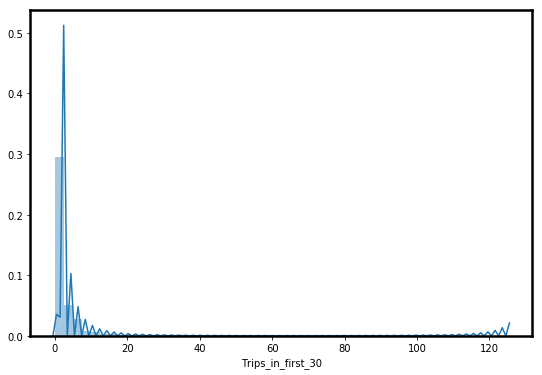

In [61]:
#sns.distplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.Trips_in_first_30)

In [43]:
predictors = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver',
              'avg_surge','surge_pct', 'Trips_in_first_30','weekday_pct','dist_first_30']

X = df[predictors]
y  = df.long_term_status

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print
print(X_test.shape)

(40000, 8)

(10000, 8)


In [45]:
y_test.value_counts()

st    6285
lt    3715
Name: long_term_status, dtype: int64

## Logistic Regression: Baseline Model

In [46]:
# Instantiate Logistic Regression Model
lr = LogisticRegression(random_state = 3)
# build the model using training data
lr.fit(X_train, y_train)
score = lr.score(X_test,y_test)
print(score)

/Users/scottlew/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.662


In [47]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
print()
cm = confusion_matrix(actual,predictions)
print(cm)

()
[[ 669 3046]
 [ 334 5951]]


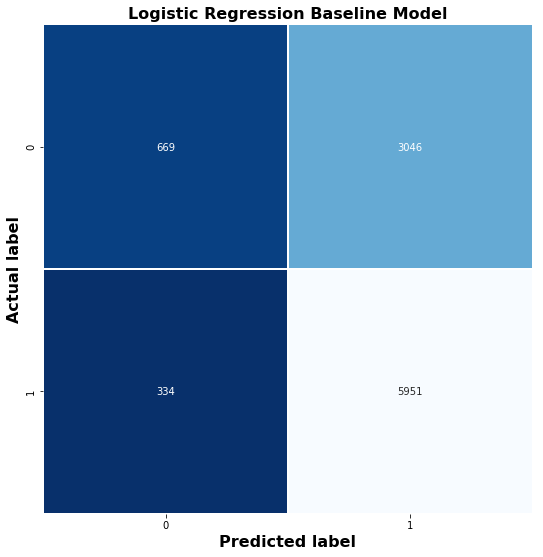

In [65]:
# Confusion matrix for Logistic Regression Model
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar= None);
plt.ylabel('Actual label',fontsize=16,fontweight='bold');
plt.xlabel('Predicted label',fontsize=16,fontweight='bold');
plt.title('Logistic Regression Baseline Model',fontsize=16,fontweight='bold');
#plt.savefig('ConfusionMatrix_VotingClassifier_Locations_Model_1.png')

## Long term users are hard to predict with Logistic Regression Model!

## More Classifiers: ...................

In [49]:
# Multinomail Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
# evaluate accuracy of our model on test data
print("MNB classifier Score: {:.2f}".format(mnb.score(X_test, y_test)))
print

MNB classifier Score: 0.61



In [50]:
# Passive Aggressive Classifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
# evaluate accuracy of our model on test data
print("Passive Aggressive classifier Score: {:.2f}".format(pac.score(X_test, y_test)))
print

Passive Aggressive classifier Score: 0.64



/Users/scottlew/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [51]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
# evaluate accuracy of our model on test data
print("SVC classifier Score: {:.2f}".format(svc.score(X_test, y_test)))
print

/Users/scottlew/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC classifier Score: 0.74



In [52]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
# evaluate accuracy of our model on test data
print("Decision Tree classifier Score: {:.2f}".format(dtc.score(X_test, y_test)))
print

Decision Tree classifier Score: 0.74



In [53]:
# Random Forest Classifier
#rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf = RandomForestClassifier(max_depth=15, n_estimators=100)
rf.fit(X_train,y_train)
# evaluate accuracy of our model on test data
print("Random Forest classifier Score: {:.2f}".format(rf.score(X_test, y_test)))
print

Random Forest classifier Score: 0.75



## Enhanced Data Features for Prediction

In [54]:
X = df.drop(['long_term_status','city','phone','last_trip_date','signup_date','month_last_trip',\
              'delta_time_last_trip_months','trips_in_first_30_days'],axis=1)

y  = df.long_term_status

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print
print(X_test.shape)

(40000, 11)

(10000, 11)


In [55]:
X.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'surge_pct', u'ultimate_black_user', u'weekday_pct',
       u'month_signup', u'Trips_in_first_30', u'dist_first_30',
       u'retain_status'],
      dtype='object')

In [56]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
# evaluate accuracy of our model on test data
print("Decision Tree classifier Score: {:.2f}".format(dtc.score(X_test, y_test)))
print

Decision Tree classifier Score: 0.73



In [57]:
# Generate Confusion Matrix for Decision Tree Classifier
actual = y_test
predictions = dtc.predict(X_test)
print
cm_dtc = confusion_matrix(actual,predictions)
print(cm_dtc)


[[1808 1962]
 [ 700 5530]]


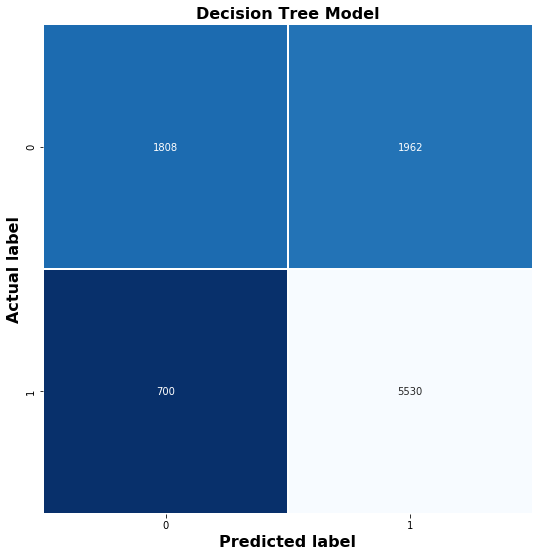

In [66]:
# Confusion matrix for Decision Tree Classifier
plt.figure(figsize=(9,9))
sns.heatmap(cm_dtc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar= None);
plt.ylabel('Actual label',fontsize=16,fontweight='bold');
plt.xlabel('Predicted label',fontsize=16,fontweight='bold');
plt.title('Decision Tree Model',fontsize=16,fontweight='bold');
#plt.savefig('ConfusionMatrix_VotingClassifier_Locations_Model_1.png')

Text(0,0.5,'Feature')

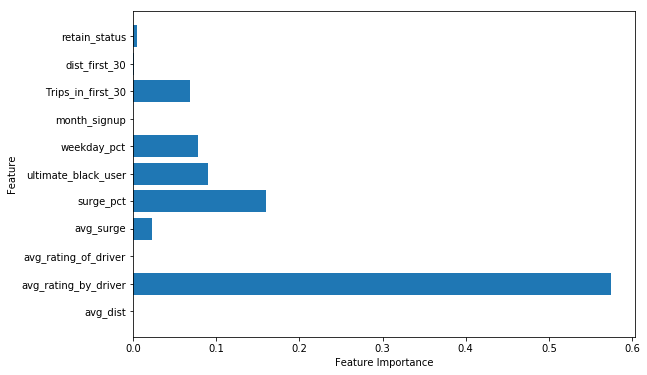

In [59]:
n_features = X.shape[1]

plt.figure(figsize=(9,6))
plt.barh(range(n_features), dtc.feature_importances_, align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

In [60]:
# Random Forest Classifier
#rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# evaluate accuracy of our model on test data
print("Random Forest classifier Score: {:.2f}".format(rf.score(X_test, y_test)))
print

/Users/scottlew/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest classifier Score: 0.71

